# Cleaning the UN Migrant Stock Total (2015) dataset

In [729]:
#Install necessary packages
#This is necessary for working with Excel files
!pip install openpyxl 

In [730]:
#Import the necessary packages
import pandas as pd
import openpyxl 
from openpyxl import load_workbook

In [731]:
# Upload Excel file as a URL
url = "https://github.com/shionguha/inf1340-programmingfordatascience-fa22/raw/60b7f5d757553308a4b5db8c439c360ea244e07d/project%20data/UN_MigrantStockTotal_2015.xlsx"

In [732]:
# Upload Table 1 as a dataframe
df1 = pd.read_excel(url, sheet_name = "Table 1", skiprows = 14) # "Skiprows" avoids all of the title rows from the Excel file
df1.head(5)

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),International migrant stock at mid-year (both sexes),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,International migrant stock at mid-year (female),Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010,...,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,1.0,WORLD,NaN,900.0,NaN,152563212,160801752,172703309,191269100,221714243,...,87884839,97866674,114613714,126115435,74815702,79064275,84818470,93402426,107100529,117584801
2,2.0,Developed regions,(b),901.0,NaN,82378628,92306854,103375363,117181109,132560325,...,50536796,57217777,64081077,67618619,42115231,47214055,52838567,59963332,68479248,72863336
3,3.0,Developing regions,(c),902.0,NaN,70184584,68494898,69327946,74087991,89153918,...,37348043,40648897,50532637,58496816,32700471,31850220,31979903,33439094,38621281,44721465
4,4.0,Least developed countries,(d),941.0,NaN,11075966,11711703,10077824,9809634,10018128,...,5361902,5383009,5462714,6463217,5236216,5573685,4721920,4432371,4560536,5493028


In [733]:
# Step 1 - Renaming the columns to combine sex and year 
# This is in preparation to melt them in the future

# Make a list of the years, to use for the column names
years = [1990, 1995, 2000, 2005, 2010, 2015]

# Define a function for renaming the column names
def col_rename(dataframe, sex, start_col, end_col):
    col_names = dataframe.columns.values.tolist() # Get a list of the current column names
    
    j = 0 # This is a counter variable
    # Make a for-loop to change the names
    for i in range(start_col, end_col): # Determine the columns to change
        dataframe.rename(columns = {col_names[i]: sex + " - " + str(years[j])}, inplace = True) # Rename it by combining the sex we assign with the year (pulled from the list we made above)
        j += 1 # Add to the counter so it goes through the full list of years

In [734]:
# Put the df1 columns through the function
col_rename(df1, "Both sexes", 5, 11)
col_rename(df1, "Male", 11, 17)
col_rename(df1, "Female", 17, 23)

# Drop the first row (after column headers) to get rid of the empty/unnecessary rows
df1 = df1.drop([0])
df1.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Both sexes - 1990,Both sexes - 1995,Both sexes - 2000,Both sexes - 2005,Both sexes - 2010,...,Male - 2000,Male - 2005,Male - 2010,Male - 2015,Female - 1990,Female - 1995,Female - 2000,Female - 2005,Female - 2010,Female - 2015
1,1.0,WORLD,NaN,900.0,NaN,152563212,160801752,172703309,191269100,221714243,...,87884839,97866674,114613714,126115435,74815702,79064275,84818470,93402426,107100529,117584801
2,2.0,Developed regions,(b),901.0,NaN,82378628,92306854,103375363,117181109,132560325,...,50536796,57217777,64081077,67618619,42115231,47214055,52838567,59963332,68479248,72863336
3,3.0,Developing regions,(c),902.0,NaN,70184584,68494898,69327946,74087991,89153918,...,37348043,40648897,50532637,58496816,32700471,31850220,31979903,33439094,38621281,44721465
4,4.0,Least developed countries,(d),941.0,NaN,11075966,11711703,10077824,9809634,10018128,...,5361902,5383009,5462714,6463217,5236216,5573685,4721920,4432371,4560536,5493028
5,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,59105261,56778501,59244124,64272611,79130668,...,31986141,35265888,45069923,52033599,27464255,26276535,27257983,29006723,34060745,39228437


In [735]:
# Step 2 - Melt the columns and turn them into one single column "demographic"

# Melt the sex and year columns
df1 = df1.melt(id_vars = df1.iloc[:, 0:5],
               var_name = "demographic", value_name = "International migrant stock at mid-year") # Naming the new column to describe what the information is

df1.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),demographic,International migrant stock at mid-year
0,1.0,WORLD,NaN,900.0,NaN,Both sexes - 1990,152563212
1,2.0,Developed regions,(b),901.0,NaN,Both sexes - 1990,82378628
2,3.0,Developing regions,(c),902.0,NaN,Both sexes - 1990,70184584
3,4.0,Least developed countries,(d),941.0,NaN,Both sexes - 1990,11075966
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,Both sexes - 1990,59105261


In [736]:
# Do steps 1-2 on Table 2

# Start by uploading it as a new dataframe
df2 = pd.read_excel(url, sheet_name = "Table 2", skiprows = 14)
df2.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Total population of both sexes at mid-year (thousands),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Total female population at mid-year (thousands),Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,1990.000,1995.000,2000.000,2005.000,2010.000,2015.000,...,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,1.0,WORLD,NaN,900.0,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,...,3.08454e+06,3.28508e+06,3.49396e+06,3.70721e+06,2.63924e+06,2.84849e+06,3.04208e+06,3.23455e+06,3.43577e+06,3.64227e+06
2,2.0,Developed regions,(b),901.0,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,...,578010,587962,599955,609297,589207,601493,610802,620957,633420,642054
3,3.0,Developing regions,(c),902.0,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,...,2.50653e+06,2.69712e+06,2.894e+06,3.09791e+06,2.05004e+06,2.24699e+06,2.43128e+06,2.6136e+06,2.80235e+06,3.00021e+06
4,4.0,Least developed countries,(d),941.0,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,...,331482,375758,422398,476031,256015,293163,332904,377047,424857,478127


In [737]:
# Put df2 through the function to rename the columns as concatenations of sex-year

col_rename(df2, "Both sexes", 4, 10)
col_rename(df2, "Male", 10, 16)
col_rename(df2, "Female", 16, 22)

# Drop the first row (after column headers) to get rid of empty cells
df2 = df2.drop([0])

# Melt the columns so that there is one demographic column
df2 = df2.melt(id_vars = df2.iloc[:, 0:4],
              var_name = "demographic", value_name = "Total population at mid-year")

# There are now the same number of rows as in DF1
df2.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,demographic,Total population at mid-year
0,1.0,WORLD,NaN,900.0,Both sexes - 1990,5.30967e+06
1,2.0,Developed regions,(b),901.0,Both sexes - 1990,1.14446e+06
2,3.0,Developing regions,(c),902.0,Both sexes - 1990,4.1652e+06
3,4.0,Least developed countries,(d),941.0,Both sexes - 1990,510058
4,5.0,Less developed regions excluding least develop...,NaN,934.0,Both sexes - 1990,3.65515e+06


In [738]:
# Do steps 1-2 on Table 3

# Upload the table
df3 = pd.read_excel(url, sheet_name = "Table 3", skiprows = 14) 
df3.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),International migrant stock as a percentage of the total population (both sexes),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,International migrant stock as a percentage of the total population (female),Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010.000000,...,2000,2005,2010,2015,1990,1995,2000,2005,2010,2015
1,1.0,WORLD,NaN,900.0,NaN,2.87331,2.80381,2.8189,2.93374,3.199467,...,2.84921,2.97912,3.28034,3.4019,2.83474,2.77566,2.78817,2.88765,3.11722,3.22834
2,2.0,Developed regions,(b),901.0,NaN,7.19802,7.89109,8.69569,9.69304,10.747765,...,8.74324,9.73154,10.681,11.0978,7.14778,7.84948,8.65069,9.6566,10.811,11.3485
3,3.0,Developing regions,(c),902.0,NaN,1.68502,1.50032,1.40402,1.39507,1.565106,...,1.49003,1.50712,1.74612,1.88827,1.59512,1.41746,1.31535,1.27943,1.37818,1.49061
4,4.0,Least developed countries,(d),941.0,NaN,2.17151,2.00135,1.51686,1.30308,1.182422,...,1.61755,1.43257,1.29326,1.35773,2.04528,1.90123,1.4184,1.17555,1.07343,1.14886


In [739]:
# Put df3 through the function to rename the columns as concatenations of sex-year

col_rename(df3, "Both sexes", 5, 11)
col_rename(df3, "Male", 11, 17)
col_rename(df3, "Female", 17, 23)

# Drop the first row (after column headers) to get rid of empty cells
df3 = df3.drop([0])

# Melt the columns into one demographic column and column for the variable of interest
df3 = df3.melt(id_vars = df3.iloc[:, 0:5],
              var_name = "demographic", value_name = "International migrant stock as percentage of total population")

df3.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),demographic,International migrant stock as percentage of total population
0,1.0,WORLD,NaN,900.0,NaN,Both sexes - 1990,2.87331
1,2.0,Developed regions,(b),901.0,NaN,Both sexes - 1990,7.19802
2,3.0,Developing regions,(c),902.0,NaN,Both sexes - 1990,1.68502
3,4.0,Least developed countries,(d),941.0,NaN,Both sexes - 1990,2.17151
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,Both sexes - 1990,1.61704


In [740]:
# Do Steps 1-2 on Table 4

# Upload it as a dataframe
df4 = pd.read_excel(url, sheet_name = "Table 4", skiprows = 14)
df4.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Female migrants as a percentage of the international migrant stock,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010.000000,2015.000000
1,1.0,WORLD,NaN,900.0,NaN,49.0391,49.1688,49.1122,48.833,48.305660,48.249769
2,2.0,Developed regions,(b),901.0,NaN,51.124,51.149,51.1133,51.1715,51.658932,51.866687
3,3.0,Developing regions,(c),902.0,NaN,46.5921,46.5001,46.1284,45.1343,43.319780,43.327078
4,4.0,Least developed countries,(d),941.0,NaN,47.2612,47.5717,46.8267,45.1574,45.499573,45.942752


In [741]:
# Put the dataframe through the function to rename the column
col_rename(df4, "Female", 5, 11)

# Drop the first empty row
df4 = df4.drop([0])

# Melt so that there is one demographic column
df4 = df4.melt(id_vars = df4.iloc[:, 0:5],
        var_name = "demographic", value_name = "Percentage of international migrant stock")

df4.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),demographic,Percentage of international migrant stock
0,1.0,WORLD,NaN,900.0,NaN,Female - 1990,49.0391
1,2.0,Developed regions,(b),901.0,NaN,Female - 1990,51.124
2,3.0,Developing regions,(c),902.0,NaN,Female - 1990,46.5921
3,4.0,Least developed countries,(d),941.0,NaN,Female - 1990,47.2612
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,Female - 1990,46.4667


In [742]:
# Do Steps 1-2 on Table 5 (will need to be a little different as it uses Year Ranges rather than Years)

# Upload Table 5 as a new dataframe
df5 = pd.read_excel(url, sheet_name = "Table 5", skiprows = 14)
df5.head(10)

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Annual rate of change of the migrant stock (both sexes),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Annual rate of change of the migrant stock (male),Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Annual rate of change of the migrant stock (female),Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,1.0,WORLD,NaN,900.0,NaN,1.05186,1.42806,2.04212,2.95416,1.89099,1.00092,1.45029,2.15158,3.15923,1.9126,1.10467,1.40504,1.92808,2.73701,1.86784
2,2.0,Developed regions,(b),901.0,NaN,2.27585,2.26497,2.50708,2.46634,1.16082,2.2656,2.27958,2.48326,2.26569,1.07469,2.28564,2.25099,2.52984,2.65595,1.2411
3,3.0,Developing regions,(c),902.0,NaN,-0.487389,0.241777,1.32811,3.70222,2.92963,-0.45298,0.380246,1.69382,4.35295,2.92706,-0.526904,0.0812677,0.89236,2.88156,2.933
4,4.0,Least developed countries,(d),941.0,NaN,1.11817,-3.00114,-0.539636,0.419137,3.52693,1.00007,-2.71895,0.078575,0.293964,3.36363,1.24915,-3.31682,-1.26562,0.57011,3.72079
5,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,-0.803244,0.850177,1.62934,4.15934,2.85269,-0.733256,0.950231,1.95227,4.90598,2.87349,-0.88418,0.733402,1.24362,3.21236,2.82513
6,6.0,Sub-Saharan Africa,(e),947.0,NaN,0.845374,-2.2171,0.3391,2.10148,4.06982,0.73894,-2.17005,0.637663,1.90652,4.19488,0.963409,-2.26912,0.0029232,2.32221,3.92877
7,7.0,Africa,NaN,903.0,NaN,0.826734,-1.99504,0.521298,2.0609,4.07872,0.798774,-1.84812,0.932749,1.87245,4.1494,0.857926,-2.15998,0.0453435,2.28152,3.99651
8,8.0,Eastern Africa,NaN,910.0,NaN,-3.43541,-0.721421,-0.412932,-0.377467,5.4933,-3.44638,-0.82504,0.390236,-1.33428,5.46131,-3.42378,-0.612122,-1.29182,0.661361,5.52629
9,9.0,Burundi,NaN,108.0,B R,-5.35572,-14.1472,6.38476,6.16248,3.96266,-5.47551,-14.184,6.55882,6.23417,3.978,-5.24123,-14.1124,6.21857,6.0932,3.94777


In [743]:
# Rename the columns (using Year Ranges rather than Years)

# Make a list of the year ranges
ranges = ["1990-1995", "1995-2000", "2000-2005", "2005-2010", "2010-2015"]

# Make a list of the DF5 column names
col_names_df5 = df5.columns.values.tolist()

# Make a loop for each sex to go through and rename the columns
# Loop for the "Both sexes" columns
p = 0 # Counter variable
for i in range(5, 10):
    df5.rename(columns = {col_names_df5[i]: "Both Sexes" + " - " + str(ranges[p])}, inplace = True)
    p += 1 # Add to the counter
    
# Loop for the "Male" columns
q = 0
for i in range(10, 15):
    df5.rename(columns = {col_names_df5[i]: "Male" + " - " + str(ranges[q])}, inplace = True)
    q += 1 # Add to the counter
    
# Loop for the "Female" columns
r = 0
for i in range(15, 20):
    df5.rename(columns = {col_names_df5[i]: "Female" + " - " + str(ranges[r])}, inplace = True)
    r += 1 # Add to the counter

df5 = df5.drop([0]) # Drop the first row after the headers, with empty values
df5.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Both Sexes - 1990-1995,Both Sexes - 1995-2000,Both Sexes - 2000-2005,Both Sexes - 2005-2010,Both Sexes - 2010-2015,Male - 1990-1995,Male - 1995-2000,Male - 2000-2005,Male - 2005-2010,Male - 2010-2015,Female - 1990-1995,Female - 1995-2000,Female - 2000-2005,Female - 2005-2010,Female - 2010-2015
1,1.0,WORLD,NaN,900.0,NaN,1.05186,1.42806,2.04212,2.95416,1.89099,1.00092,1.45029,2.15158,3.15923,1.9126,1.10467,1.40504,1.92808,2.73701,1.86784
2,2.0,Developed regions,(b),901.0,NaN,2.27585,2.26497,2.50708,2.46634,1.16082,2.2656,2.27958,2.48326,2.26569,1.07469,2.28564,2.25099,2.52984,2.65595,1.2411
3,3.0,Developing regions,(c),902.0,NaN,-0.487389,0.241777,1.32811,3.70222,2.92963,-0.45298,0.380246,1.69382,4.35295,2.92706,-0.526904,0.0812677,0.89236,2.88156,2.933
4,4.0,Least developed countries,(d),941.0,NaN,1.11817,-3.00114,-0.539636,0.419137,3.52693,1.00007,-2.71895,0.078575,0.293964,3.36363,1.24915,-3.31682,-1.26562,0.57011,3.72079
5,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,-0.803244,0.850177,1.62934,4.15934,2.85269,-0.733256,0.950231,1.95227,4.90598,2.87349,-0.88418,0.733402,1.24362,3.21236,2.82513


In [744]:
# Melt it so that there is a "demographic" column
df5 = df5.melt(id_vars = df5.iloc[:, 0:5],
               var_name = "demographic", value_name = "Annual rate of change of the migrant stock")

df5.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),demographic,Annual rate of change of the migrant stock
0,1.0,WORLD,NaN,900.0,NaN,Both Sexes - 1990-1995,1.05186
1,2.0,Developed regions,(b),901.0,NaN,Both Sexes - 1990-1995,2.27585
2,3.0,Developing regions,(c),902.0,NaN,Both Sexes - 1990-1995,-0.487389
3,4.0,Least developed countries,(d),941.0,NaN,Both Sexes - 1990-1995,1.11817
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,Both Sexes - 1990-1995,-0.803244


In [745]:
# Do Steps 1-2 on Table 6 (a combination of Years and Year Ranges)

# Upload Table 6 as its own dataframe
df6 = pd.read_excel(url, sheet_name = "Table 6", skiprows = 14)
df6.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Estimated refugee stock at mid-year (both sexes),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Annual rate of change of the refugee stock,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,NaN,NaN,NaN,NaN,1990,1995,2000,2005,2010,...,1995,2000,2005,2010.000000,2015.000000,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
1,1.0,WORLD,NaN,900.0,NaN,18836571,17853840,15827803,13276733,15370755,...,11.103,9.16474,6.94139,6.932687,8.033424,-2.1235,-3.83707,-5.55722,-0.025089,2.94727
2,2.0,Developed regions,(b),901.0,NaN,2014564,3609670,2997256,2361229,2046917,...,3.91051,2.89939,2.01503,1.544140,1.391085,9.38842,-5.98335,-7.27738,-5.32329,-2.08766
3,3.0,Developing regions,(c),902.0,NaN,16822007,14244170,12830547,10915504,13323838,...,20.796,18.507,14.7332,14.944759,17.073768,-2.83942,-2.33215,-4.561,0.285195,2.66365
4,4.0,Least developed countries,(d),941.0,NaN,5048391,5160131,3047488,2363782,1957884,...,44.042,30.2216,24.0824,19.533425,28.801534,-0.680327,-7.53175,-4.54146,-4.18711,7.76603


In [746]:
# Rename all columns so that they list the year and variable (rather than sex in this case)

# List of df6 columns (to reference in function)
col_names_df6 = df6.columns.values.tolist()

# For two of the variables (that use Years), use the function from before, but use a variable code instead of a sex
col_rename(df6, "Variable 1", 5, 11) # Variable 1 = Estimated refugee stock
col_rename(df6, "Variable 2", 11, 17) # Variable 2 = Refugees as percentage of immigrant stock

# The last variable uses Year Ranges, so I will use a for-loop and the "ranges" list from before
f = 0 #Counter variable
for i in range(17, 22): # Variable 3 = Annual rate of change of the referee stock
    df6.rename(columns = {col_names_df6[i]: "Variable 3" + " - " + str(ranges[f])}, inplace = True)
    f += 1 # Add to the counter

df6 = df6.drop([0]) # Drop the empty first row
df6.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),Variable 1 - 1990,Variable 1 - 1995,Variable 1 - 2000,Variable 1 - 2005,Variable 1 - 2010,...,Variable 2 - 1995,Variable 2 - 2000,Variable 2 - 2005,Variable 2 - 2010,Variable 2 - 2015,Variable 3 - 1990-1995,Variable 3 - 1995-2000,Variable 3 - 2000-2005,Variable 3 - 2005-2010,Variable 3 - 2010-2015
1,1.0,WORLD,NaN,900.0,NaN,18836571,17853840,15827803,13276733,15370755,...,11.103,9.16474,6.94139,6.932687,8.033424,-2.1235,-3.83707,-5.55722,-0.025089,2.94727
2,2.0,Developed regions,(b),901.0,NaN,2014564,3609670,2997256,2361229,2046917,...,3.91051,2.89939,2.01503,1.544140,1.391085,9.38842,-5.98335,-7.27738,-5.32329,-2.08766
3,3.0,Developing regions,(c),902.0,NaN,16822007,14244170,12830547,10915504,13323838,...,20.796,18.507,14.7332,14.944759,17.073768,-2.83942,-2.33215,-4.561,0.285195,2.66365
4,4.0,Least developed countries,(d),941.0,NaN,5048391,5160131,3047488,2363782,1957884,...,44.042,30.2216,24.0824,19.533425,28.801534,-0.680327,-7.53175,-4.54146,-4.18711,7.76603
5,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,11773616,9084039,9783059,8551722,11365954,...,15.9991,16.5131,13.3054,14.363526,15.537313,-4.3836,0.632489,-4.31973,1.53046,1.57105


In [747]:
# In order to melt the columns, I need to separate the datasets (into the different Variables)

# Make a datset with all the information for Variable 1
df6_V1 = df6.iloc[:, 0:11]

# Melt it
df6_V1 = df6_V1.melt(id_vars = df6_V1.iloc[:, 0:5],
                                     var_name = "demographic", value_name = "Estimated refugee stock at mid-year (both sexes)")

df6_V1.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),demographic,Estimated refugee stock at mid-year (both sexes)
0,1.0,WORLD,NaN,900.0,NaN,Variable 1 - 1990,18836571
1,2.0,Developed regions,(b),901.0,NaN,Variable 1 - 1990,2014564
2,3.0,Developing regions,(c),902.0,NaN,Variable 1 - 1990,16822007
3,4.0,Least developed countries,(d),941.0,NaN,Variable 1 - 1990,5048391
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,Variable 1 - 1990,11773616


In [748]:
# Make a dataset for Variable 2
df6_V2 = df6.iloc[:, [0, 1, 2, 3, 4, 11, 12, 13, 14, 15, 16]]

# Melt it
df6_V2 = df6_V2.melt(id_vars = df6_V2.iloc[:, 0:5],
                                     var_name = "demographic", value_name = "Refugees as a percentage of the international migrant stock")

df6_V2.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),demographic,Refugees as a percentage of the international migrant stock
0,1.0,WORLD,NaN,900.0,NaN,Variable 2 - 1990,12.3467
1,2.0,Developed regions,(b),901.0,NaN,Variable 2 - 1990,2.44549
2,3.0,Developing regions,(c),902.0,NaN,Variable 2 - 1990,23.9682
3,4.0,Least developed countries,(d),941.0,NaN,Variable 2 - 1990,45.5659
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,Variable 2 - 1990,19.9197


In [749]:
# Make a dataset for Variable 3
df6_V3 = df6.iloc[:, [0, 1, 2, 3, 4, 17, 18, 19, 20, 21]]

# Melt it
df6_V3 = df6_V3.melt(id_vars = df6_V3.iloc[:, 0:5],
                     var_name = "demographic", value_name = "Annual rate of change of the refugee stock")


df6_V3.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),demographic,Annual rate of change of the refugee stock
0,1.0,WORLD,NaN,900.0,NaN,Variable 3 - 1990-1995,-2.1235
1,2.0,Developed regions,(b),901.0,NaN,Variable 3 - 1990-1995,9.38842
2,3.0,Developing regions,(c),902.0,NaN,Variable 3 - 1990-1995,-2.83942
3,4.0,Least developed countries,(d),941.0,NaN,Variable 3 - 1990-1995,-0.680327
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,Variable 3 - 1990-1995,-4.3836


In [750]:
# Step 3 - Bring the unique columns from the tables measuring in years into one dataframe (df1) so that they are all together

# Unique measurement from Table 2
total_pop = df2["Total population at mid-year"].tolist()

# Unique measurement from Table 3
mig_percent = df3["International migrant stock as percentage of total population"].tolist()

# Adding the lists as new columns for df1
df1["Total population at mid-year (in thousands)"] = total_pop
df1["International migrant stock as percentage of total population"] = mig_percent

df1.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),demographic,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population
0,1.0,WORLD,NaN,900.0,NaN,Both sexes - 1990,152563212,5.30967e+06,2.87331
1,2.0,Developed regions,(b),901.0,NaN,Both sexes - 1990,82378628,1.14446e+06,7.19802
2,3.0,Developing regions,(c),902.0,NaN,Both sexes - 1990,70184584,4.1652e+06,1.68502
3,4.0,Least developed countries,(d),941.0,NaN,Both sexes - 1990,11075966,510058,2.17151
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,Both sexes - 1990,59105261,3.65515e+06,1.61704


In [751]:
# Step 3, Part 2
# Move the final column in df4 to df1 (by turning it into a list, and filling in the empty spaces for "both sexes" and "male")

# Make a list that will be the column
fem_perc = []

# Make variables for the counters in the for loop
m = -1
n = 0 

# A loop that will add values as necessary to the "fem_perc" list 
for i in range(0, df1.shape[0]):
    m += 1 # Increase the counter
    
    if m < (df1.shape[0] - df4.shape[0]): # This represents the rows in df1 that are not Female
        fem_perc.append("NA") # let it be empty/ not have a value
    else: # Once the index matches that of the "Female" observations in DF1
        fem_perc.append(df4.at[n, "Percentage of international migrant stock"]) # Add the value from the final column in DF4
        n += 1 # Increase the counter within this portion of the conditional to go through the column

# Add these values to df1
df1["Percentage of international migrant stock"] = fem_perc
df1.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),demographic,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock
0,1.0,WORLD,NaN,900.0,NaN,Both sexes - 1990,152563212,5.30967e+06,2.87331,NA
1,2.0,Developed regions,(b),901.0,NaN,Both sexes - 1990,82378628,1.14446e+06,7.19802,NA
2,3.0,Developing regions,(c),902.0,NaN,Both sexes - 1990,70184584,4.1652e+06,1.68502,NA
3,4.0,Least developed countries,(d),941.0,NaN,Both sexes - 1990,11075966,510058,2.17151,NA
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,Both sexes - 1990,59105261,3.65515e+06,1.61704,NA


In [752]:
# Step 3, Part 3 - Add column from df6_V1 to df1

# Make a list that will be the column
est_ref_stock = []

# Counter variables
k = -1
j = 0

for i in range(0, df1.shape[0]): 
    k += 1 # Increase the counter to test whether it's in the "Both Sexes" range or not
    
    if k < df6_V1.shape[0]: # When the counter is within the "Both Sexes" range (for both df1 and df6_V1)...
        est_ref_stock.append(df6_V1.at[j, "Estimated refugee stock at mid-year (both sexes)"]) # Add the value from df6_V1
        j += 1 # Increase the counter to go through the df6_V1 column
    else: # Once outside of the "Both Sexes" range in df1
        est_ref_stock.append("NA") # Just leave it as a non-value
    
# Add the list as a new column in Df1
df1["Estimated refugee stock at mid-year"] = est_ref_stock
df1.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),demographic,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year
0,1.0,WORLD,NaN,900.0,NaN,Both sexes - 1990,152563212,5.30967e+06,2.87331,NA,18836571
1,2.0,Developed regions,(b),901.0,NaN,Both sexes - 1990,82378628,1.14446e+06,7.19802,NA,2014564
2,3.0,Developing regions,(c),902.0,NaN,Both sexes - 1990,70184584,4.1652e+06,1.68502,NA,16822007
3,4.0,Least developed countries,(d),941.0,NaN,Both sexes - 1990,11075966,510058,2.17151,NA,5048391
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,Both sexes - 1990,59105261,3.65515e+06,1.61704,NA,11773616


In [753]:
# Step 3, Part 4 - Add column from df6_V2 to df1

# Make a list that will be the column
ref_perc = []

# Counter variables
k = -1
j = 0

for i in range(0, df1.shape[0]): 
    k += 1 # Increase the counter to test whether it's in the "Both Sexes" range or not
    
    if k < df6_V2.shape[0]: # When the counter is within the "Both Sexes" range (for both df1 and df6_V2)...
        ref_perc.append(df6_V2.at[j, "Refugees as a percentage of the international migrant stock"]) # Add the value from df6_V2
        j += 1 # Increase the counter to go through the df6_V2 column
    else: # Once outside of the "Both Sexes" range in df1
        ref_perc.append("NA") # Just leave it as a non-value
    
# Add the list as a new column in Df1
df1["Refugees as a percentage of the international migrant stock"] = ref_perc
df1.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),demographic,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
0,1.0,WORLD,NaN,900.0,NaN,Both sexes - 1990,152563212,5.30967e+06,2.87331,NA,18836571,12.3467
1,2.0,Developed regions,(b),901.0,NaN,Both sexes - 1990,82378628,1.14446e+06,7.19802,NA,2014564,2.44549
2,3.0,Developing regions,(c),902.0,NaN,Both sexes - 1990,70184584,4.1652e+06,1.68502,NA,16822007,23.9682
3,4.0,Least developed countries,(d),941.0,NaN,Both sexes - 1990,11075966,510058,2.17151,NA,5048391,45.5659
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,Both sexes - 1990,59105261,3.65515e+06,1.61704,NA,11773616,19.9197


In [754]:
# Step 3, Part 4 - Add column from df6_V3 to df5

# Make a list that will be the column
ann_ref_change = []

# Counter variables
k = -1
j = 0

for i in range(0, df5.shape[0]): 
    k += 1 # Increase the counter to test whether it's in the "Both Sexes" range or not
    
    if j < df6_V3.shape[0]: # When the counter is within the "Both Sexes" range (for both df1 and df6_V2)...
        ann_ref_change.append(df6_V3.at[j, "Annual rate of change of the refugee stock"]) # Add the value from df6_V2
        j += 1 # Increase the counter to go through the df6_V2 column
    else: # Once outside of the "Both Sexes" range in df1
        ann_ref_change.append("NA") # Just leave it as a non-value
    
# Add the list as a new column in Df1
df5["Annual rate of change of the refugee stock"] = ann_ref_change
df5.head()

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Type of data (a),demographic,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
0,1.0,WORLD,NaN,900.0,NaN,Both Sexes - 1990-1995,1.05186,-2.1235
1,2.0,Developed regions,(b),901.0,NaN,Both Sexes - 1990-1995,2.27585,9.38842
2,3.0,Developing regions,(c),902.0,NaN,Both Sexes - 1990-1995,-0.487389,-2.83942
3,4.0,Least developed countries,(d),941.0,NaN,Both Sexes - 1990-1995,1.11817,-0.680327
4,5.0,Less developed regions excluding least develop...,NaN,934.0,NaN,Both Sexes - 1990-1995,-0.803244,-4.3836


In [755]:
# From now on, tha main dataframes I will be using are:
# df1 (A collection of the information based on YEARS only - from Table 1, Table 2, Table 3, Table 4 and part of Table 6)
# df5 (A collection of information for YEAR-RANGES (Table 5 and part of 6))

In [756]:
#Step 4 - For each of the datasets Split the Type of Data column...

# Create new empty columns...
Born_or_Citizen = []
Refugees_added = []
Imputation = []

# Create a function to fill columns with spaces, make them the same length as dataset
def fill_columns(column):
    for i in range(0, df1.shape[0]):
        column.append(' ')

# Fill the columns with spaces
fill_columns(Born_or_Citizen)
fill_columns(Refugees_added)
fill_columns(Imputation)

# Insert them into the dataframe
df1.insert(5, "Born or Citizen", Born_or_Citizen)
df1.insert(6, "Refugees Added", Refugees_added)
df1.insert(7, "Imputation", Imputation)

In [757]:
# Add to the "Born or Citizen" column based on the "Type of Data (A)" column
for i in range(0, df1.shape[0]): # See if there is a B or C in the column
    if "B" in str(df1.at[i, 'Type of data (a)']):
        df1.at[i, 'Born or Citizen'] = "Born"
    elif "C" in str(df1.at[i, 'Type of data (a)']):
        df1.at[i, 'Born or Citizen'] = "Citizen"
        
# Add to the "Refugees Added Column" - see if there is an R in the cell
for i in range(0, df1.shape[0]):
    if "R" in str(df1.at[i, 'Type of data (a)']):
        df1.at[i, 'Refugees Added'] = "Yes"
    else:
        df1.at[i, 'Refugees Added'] = " " 
        
# Add to the "Imputation" column - see if there is an I in the cell
for i in range(0, df1.shape[0]):
    if "I" in str(df1.at[i, 'Type of data (a)']):
        df1.at[i, 'Imputation'] = "Yes"
    else:
        df1.at[i, 'Imputation'] = " "

# Drop the original "Type of data" column
df1.drop(columns = ['Type of data (a)'], inplace = True)
df1.reset_index() # Without this, the row indices will start at 1, not 0 
df1.iloc[10:14] # See these rows because they actually have values in these columns

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Born or Citizen,Refugees Added,Imputation,demographic,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
10,11.0,Djibouti,NaN,262.0,Born,Yes,,Both sexes - 1990,122221,588.356,20.7733,NA,54508,44.5979
11,12.0,Eritrea,NaN,232.0,,,Yes,Both sexes - 1990,11848,3139.08,0.377435,NA,0,0
12,13.0,Ethiopia,NaN,231.0,Born,Yes,,Both sexes - 1990,1155390,48057.1,2.4042,NA,741965,64.2177
13,14.0,Kenya,NaN,404.0,Born,Yes,,Both sexes - 1990,297292,23446.2,1.26797,NA,13452,4.52484


In [758]:
# Repeat Step 4 for Table 5

# Create new empty columns...
Born_or_Citizen_df5 = []
Refugees_added_df5 = []
Imputation_df5 = []

# Create a function to fill columns with spaces, make them same length as dataset
def fill_columns_df5(column):
    for i in range(0, df5.shape[0]):
        column.append(' ')

# Fill the columns with spaces
fill_columns_df5(Born_or_Citizen_df5)
fill_columns_df5(Refugees_added_df5)
fill_columns_df5(Imputation_df5)

# Insert them into the dataframe
df5.insert(5, "Born or Citizen", Born_or_Citizen_df5)
df5.insert(6, "Refugees Added", Refugees_added_df5)
df5.insert(7, "Imputation", Imputation_df5)

In [759]:
# Add to the "Born or Citizen" column based on the "Type of Data (A)" column
for i in range(0, df5.shape[0]): # See if there is a B or C in the column
    if "B" in str(df5.at[i, 'Type of data (a)']):
        df5.at[i, 'Born or Citizen'] = "Born"
    elif "C" in str(df5.at[i, 'Type of data (a)']):
        df5.at[i, 'Born or Citizen'] = "Citizen"
        
# Add to the "Refugees Added Column" - see if there is an R in the cell
for i in range(0, df5.shape[0]):
    if "R" in str(df5.at[i, 'Type of data (a)']):
        df5.at[i, 'Refugees Added'] = "Yes"
    else:
        df5.at[i, 'Refugees Added'] = " " 
        
# Add to the "Imputation" column - see if there is an I in the cell
for i in range(0, df5.shape[0]):
    if "I" in str(df5.at[i, 'Type of data (a)']):
        df5.at[i, 'Imputation'] = "Yes"
    else:
        df5.at[i, 'Imputation'] = " "

# Drop the original "Type of data" column
df5.drop(columns = ['Type of data (a)'], inplace = True)
df5.reset_index() # Without this, the row indices will start at 1, not 0 
df5.iloc[10:14] # See these rows because they actually have values in these columns

,Sort\norder,"Major area, region, country or area of destination",Notes,Country code,Born or Citizen,Refugees Added,Imputation,demographic,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
10,11.0,Djibouti,NaN,262.0,Born,Yes,,Both Sexes - 1990-1995,-4.05847,-9.76343
11,12.0,Eritrea,NaN,232.0,,,Yes,Both Sexes - 1990-1995,0.910748,..
12,13.0,Ethiopia,NaN,231.0,Born,Yes,,Both Sexes - 1990-1995,-7.17977,-5.50572
13,14.0,Kenya,NaN,404.0,Born,Yes,,Both Sexes - 1990-1995,14.6596,42.5211


In [760]:
# Step 5 - Splitting up the Demographic column
# Pull the "Sex" part from the "demographic" column and make its own column

# Make a function that calls the demographic cell, and pulls out the sex
def split_sex(r):
    sex = df1.at[r, "demographic"][0:len(df1.at[r, "demographic"]) - 7] # Pulls out Whatever is in the "demographic" column that is not the years and spaces/dash
    return sex

# Make a list that will be the 'sex' column
sexes_col = []

# Make a for loop that goes through each value in the 'demographic' column, pulls out the sex and adds it to the list of sexes
for i in range(0, df1.shape[0]):
    sexes_col.append(split_sex(i)) 

# Create a new column, add the sexes to that column
df1.insert(8, "Sex", sexes_col)

In [761]:
# Pull the "year" part from the "demographic" column and make its own column

# Make a function that calls the 'demographic' cell, and pulls out the year
def split_year(r):
    year = df1.at[r, "demographic"][len(df1.at[r, "demographic"]) - 4: len(df1.at[r, "demographic"])] # Pulls out the last 4 pieces of the cell (which is the year)
    return year

# Make a list that will be the "year" column
years_col = []

# Make a for loop that goes through each value in the 'demographic' column, pulls out the year and adds it to the list of years
for i in range(0, df1.shape[0]):
    years_col.append(split_year(i)) 

# Create a new column, add the years to that column
df1.insert(9, "Year", years_col)

In [762]:
# Drop the original demographic column and reset the index
df1 = df1.drop(columns = ['demographic'])
df1.reset_index()

# Plus rename the "Sort Order" to "Original Sort Order", to reflect that we've made changes to the ordering
df1.rename(columns = {"Sort\norder" : "Original Sort Order"}, inplace = True)
df1.head()

,Original Sort Order,"Major area, region, country or area of destination",Notes,Country code,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
0,1.0,WORLD,NaN,900.0,,,,Both sexes,1990,152563212,5.30967e+06,2.87331,NA,18836571,12.3467
1,2.0,Developed regions,(b),901.0,,,,Both sexes,1990,82378628,1.14446e+06,7.19802,NA,2014564,2.44549
2,3.0,Developing regions,(c),902.0,,,,Both sexes,1990,70184584,4.1652e+06,1.68502,NA,16822007,23.9682
3,4.0,Least developed countries,(d),941.0,,,,Both sexes,1990,11075966,510058,2.17151,NA,5048391,45.5659
4,5.0,Less developed regions excluding least develop...,NaN,934.0,,,,Both sexes,1990,59105261,3.65515e+06,1.61704,NA,11773616,19.9197


In [763]:
# Repeat Step 5 for df5

# Make a function that calls "demographic" cell and pulls out the sex
def split_sex_df5(r):
    sex = df5.at[r, "demographic"][0:len(df5.at[r, "demographic"]) - 12] # Pulls out all characters minus the year range / extra spaces/dashes (which is the sex)
    return sex

# Make a list that will be the "sexes" column
sexes_df5 = []

#Make a for-loop that goes through each value in the "demographic" column, pulls out the sex and adds it to the list of sexes for df5
for i in range(0, df5.shape[0]):
    sexes_df5.append(split_sex_df5(i))
    
# Create a new column, add the sexes to that column
df5.insert(7, "Sex", sexes_df5)

In [764]:
# Make a function that calls "demographic" cell and pulls out the year ranges
def split_range(r):
    range = df5.at[r, "demographic"][len(df5.at[r, "demographic"]) - 9: len(df5.at[r, "demographic"])] # Pulls out the last 9 characters (which is the year range)
    return range

# Make a list that will be the "year range" column
year_ranges = []

# Make a for loop that goes through each value in the "demographic" column, pulls out the year range and adds it to the list of ranges
for i in range(0, df5.shape[0]):
    year_ranges.append(split_range(i))
    
# Create a new column using the ranges list
df5.insert(8, "Year Range", year_ranges)

In [765]:
# Drop the "demographic" column and reset index
df5 = df5.drop(columns = ['demographic'])
df5.reset_index()

# Plus rename the "Sort Order" to "Original Sort Order" to reflect that we've changed the ordering
df5.rename(columns = {"Sort\norder" : "Original Sort Order"}, inplace = True)
df5.head()

,Original Sort Order,"Major area, region, country or area of destination",Notes,Country code,Born or Citizen,Refugees Added,Imputation,Sex,Year Range,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
0,1.0,WORLD,NaN,900.0,,,,Both Sexes,1990-1995,1.05186,-2.1235
1,2.0,Developed regions,(b),901.0,,,,Both Sexes,1990-1995,2.27585,9.38842
2,3.0,Developing regions,(c),902.0,,,,Both Sexes,1990-1995,-0.487389,-2.83942
3,4.0,Least developed countries,(d),941.0,,,,Both Sexes,1990-1995,1.11817,-0.680327
4,5.0,Less developed regions excluding least develop...,NaN,934.0,,,,Both Sexes,1990-1995,-0.803244,-4.3836


In [766]:
# Step 6 - Split df1 and df5 by the levels of country/region/major area (because too many kinds of observations in there)
# Will use the ANNEX to create a "Level" column that will be used to split it

In [767]:
# Upload the ANNEX sheet
annex = pd.read_excel(url, sheet_name = "ANNEX", skiprows = 14)
annex.head()

,Country code,Country or area,Sort order,Major area,Code,Sort order.1,Region,Code.1,Sort order.2,Developed region,Least developed country,Sub-Saharan Africa
0,4,Afghanistan,99,Asia,935,71,Southern Asia,5501,98,No,Yes,No
1,8,Albania,154,Europe,908,127,Southern Europe,925,153,Yes,No,No
2,12,Algeria,40,Africa,903,7,Northern Africa,912,39,No,No,No
3,16,American Samoa,257,Oceania,909,238,Polynesia,957,256,No,No,No
4,20,Andorra,155,Europe,908,127,Southern Europe,925,153,Yes,No,No


In [768]:
# Make a column that will represent the "level" so we can split it later
# Make an empty list to start
levels = []

for i in range(0, df1.shape[0]):
    levels.append(" ")
    
# Add the column to the dataframe
df1.insert(2, "Level", levels)

In [769]:
# Make a function that loops through each cell in the "Major area..." column in df1 and sees which column it fits under in ANNEX, then assigns it that label
def level_maker(df):
    for i in range(0, df.shape[0]):
        # Make short forms to use repeatedly
        cell = df.at[i, "Major area, region, country or area of destination"] # The current cell of interest

        # Use conditionals to assign it a level
        if cell in annex['Country or area'].tolist():
            df.at[i, "Level"] = "Country"
        elif cell in annex['Region'].tolist():
            df.at[i, "Level"] = "Region"
        elif cell in annex['Major area'].tolist():
            df.at[i, "Level"] = "Major area"
        elif cell == "Developed regions" or cell == "Developing regions":
            df.at[i, "Level"] = "Developed or not"
        
        # Any value that is unique enough ("WORLD", "Least developed countries", etc.) won't need a label, can split just by the value
        
level_maker(df1)
df1.head(10) # This way we can see the different label types

,Original Sort Order,"Major area, region, country or area of destination",Level,Notes,Country code,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
0,1.0,WORLD,,NaN,900.0,,,,Both sexes,1990,152563212,5.30967e+06,2.87331,NA,18836571,12.3467
1,2.0,Developed regions,Developed or not,(b),901.0,,,,Both sexes,1990,82378628,1.14446e+06,7.19802,NA,2014564,2.44549
2,3.0,Developing regions,Developed or not,(c),902.0,,,,Both sexes,1990,70184584,4.1652e+06,1.68502,NA,16822007,23.9682
3,4.0,Least developed countries,,(d),941.0,,,,Both sexes,1990,11075966,510058,2.17151,NA,5048391,45.5659
4,5.0,Less developed regions excluding least develop...,,NaN,934.0,,,,Both sexes,1990,59105261,3.65515e+06,1.61704,NA,11773616,19.9197
5,6.0,Sub-Saharan Africa,,(e),947.0,,,,Both sexes,1990,14690319,491498,2.98889,NA,5516042,37.5488
6,7.0,Africa,Major area,NaN,903.0,,,,Both sexes,1990,15690623,631614,2.48421,NA,5687352,36.2468
7,8.0,Eastern Africa,Region,NaN,910.0,,,,Both sexes,1990,5964031,198232,3.00862,NA,3168001,53.1185
8,9.0,Burundi,Country,NaN,108.0,Born,Yes,,Both sexes,1990,333110,5613.14,5.93447,NA,267929,80.4326
9,10.0,Comoros,Country,NaN,174.0,Born,,,Both sexes,1990,14079,415.144,3.39135,NA,0,0


In [770]:
# Do the same as above on df5

levels_df5 = []

for i in range(0, df5.shape[0]):
    levels_df5.append(" ")
    
# Add the column to the dataframe
df5.insert(2, "Level", levels_df5)

# Use the function on df5
level_maker(df5)
df5.head(10) # This way we can see the different label types

,Original Sort Order,"Major area, region, country or area of destination",Level,Notes,Country code,Born or Citizen,Refugees Added,Imputation,Sex,Year Range,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
0,1.0,WORLD,,NaN,900.0,,,,Both Sexes,1990-1995,1.05186,-2.1235
1,2.0,Developed regions,Developed or not,(b),901.0,,,,Both Sexes,1990-1995,2.27585,9.38842
2,3.0,Developing regions,Developed or not,(c),902.0,,,,Both Sexes,1990-1995,-0.487389,-2.83942
3,4.0,Least developed countries,,(d),941.0,,,,Both Sexes,1990-1995,1.11817,-0.680327
4,5.0,Less developed regions excluding least develop...,,NaN,934.0,,,,Both Sexes,1990-1995,-0.803244,-4.3836
5,6.0,Sub-Saharan Africa,,(e),947.0,,,,Both Sexes,1990-1995,0.845374,-0.022138
6,7.0,Africa,Major area,NaN,903.0,,,,Both Sexes,1990-1995,0.826734,0.0760368
7,8.0,Eastern Africa,Region,NaN,910.0,,,,Both Sexes,1990-1995,-3.43541,-5.30801
8,9.0,Burundi,Country,NaN,108.0,Born,Yes,,Both Sexes,1990-1995,-5.35572,-3.39093
9,10.0,Comoros,Country,NaN,174.0,Born,,,Both Sexes,1990-1995,-0.199873,..


In [771]:
# Make an extra "ANNEX" dataframe to keep track of certain information about the unique observations (World, Developed Regions, etc.) that will just repeat in each row
extra_annex = df1.iloc[0:6, 0:5]
extra_annex = extra_annex.drop(columns = ["Level"])
extra_annex

,Original Sort Order,"Major area, region, country or area of destination",Notes,Country code
0,1.0,WORLD,NaN,900.0
1,2.0,Developed regions,(b),901.0
2,3.0,Developing regions,(c),902.0
3,4.0,Least developed countries,(d),941.0
4,5.0,Less developed regions excluding least develop...,NaN,934.0
5,6.0,Sub-Saharan Africa,(e),947.0


In [772]:
# Splitting the datasets based on the "Level" value
# WORLD

# Make a dataset of all rows in df1 where the "Major area..." column is equal to "WORLD"
df1_world = df1[df1["Major area, region, country or area of destination"] == "WORLD"]

# Drop any columns that we don't need any more (because they are now in extra annex, or original ANNEX)
df1_world = df1_world.drop(columns = ["Original Sort Order", "Level", "Country code", "Refugees Added", "Imputation", "Notes", "Born or Citizen"]) # Most of this information is in the ANNEX

# Rename the "Major area.." column, as that label no longer applies
df1_world.rename(columns = {"Major area, region, country or area of destination" : "Level"}, inplace = True)

df1_world.head()

,Level,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
0,WORLD,Both sexes,1990,152563212,5.30967e+06,2.87331,NA,18836571,12.3467
265,WORLD,Both sexes,1995,160801752,5.73512e+06,2.80381,NA,17853840,11.103
530,WORLD,Both sexes,2000,172703309,6.12662e+06,2.8189,NA,15827803,9.16474
795,WORLD,Both sexes,2005,191269100,6.51964e+06,2.93374,NA,13276733,6.94139
1060,WORLD,Both sexes,2010,221714243,6.92973e+06,3.19947,NA,15370755,6.93269


In [773]:
# Developed or not
df1_dev = df1[df1["Level"] == "Developed or not"]
df1_dev = df1_dev.drop(columns = ["Original Sort Order", "Level", "Country code", "Refugees Added", "Imputation", "Notes", "Born or Citizen"])
df1_dev.rename(columns = {"Major area, region, country or area of destination" : "Type of Regions"}, inplace = True)
df1_dev.replace({'Developed regions': 'Developed', 'Developing regions': 'Developing'}, inplace = True) # Simplify the values so it is not repetitive of column header
df1_dev.head()

,Type of Regions,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
1,Developed,Both sexes,1990,82378628,1144463.062,7.198015,NA,2014564,2.44549
2,Developing,Both sexes,1990,70184584,4165204.637,1.685021,NA,16822007,23.9682
266,Developed,Both sexes,1995,92306854,1169761.211,7.891085,NA,3609670,3.91051
267,Developing,Both sexes,1995,68494898,4565361.873,1.500317,NA,14244170,20.796
531,Developed,Both sexes,2000,103375363,1188811.731,8.695688,NA,2997256,2.89939


In [774]:
# Least developed countries
df1_least_dev = df1[df1["Major area, region, country or area of destination"] == "Least developed countries"]
df1_least_dev = df1_least_dev.drop(columns = ["Original Sort Order", "Level", "Country code", "Refugees Added", "Imputation", "Notes", "Born or Citizen"])
df1_least_dev.rename(columns = {"Major area, region, country or area of destination" : "Level"}, inplace = True)
df1_least_dev.head()

,Level,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
3,Least developed countries,Both sexes,1990,11075966,510058,2.17151,NA,5048391,45.5659
268,Least developed countries,Both sexes,1995,11711703,585189,2.00135,NA,5160131,44.042
533,Least developed countries,Both sexes,2000,10077824,664386,1.51686,NA,3047488,30.2216
798,Least developed countries,Both sexes,2005,9809634,752805,1.30308,NA,2363782,24.0824
1063,Least developed countries,Both sexes,2010,10018128,847255,1.18242,NA,1957884,19.5334


In [775]:
# less developed regions minus least developed countries
df1_less = df1[df1["Major area, region, country or area of destination"] == "Less developed regions excluding least developed countries"]
df1_less = df1_less.drop(columns = ["Original Sort Order", "Level", "Country code", "Refugees Added", "Imputation", "Notes", "Born or Citizen"])
df1_less.rename(columns = {"Major area, region, country or area of destination" : "Level"}, inplace = True)
df1_less.head()

,Level,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
4,Less developed regions excluding least develop...,Both sexes,1990,59105261,3.65515e+06,1.61704,NA,11773616,19.9197
269,Less developed regions excluding least develop...,Both sexes,1995,56778501,3.98017e+06,1.42653,NA,9084039,15.9991
534,Less developed regions excluding least develop...,Both sexes,2000,59244124,4.27342e+06,1.38634,NA,9783059,16.5131
799,Less developed regions excluding least develop...,Both sexes,2005,64272611,4.55791e+06,1.41013,NA,8551722,13.3054
1064,Less developed regions excluding least develop...,Both sexes,2010,79130668,4.84909e+06,1.63186,NA,11365954,14.3635


In [776]:
# Sub-Saharan Africa
df1_subsaharan = df1[df1["Major area, region, country or area of destination"] == "Sub-Saharan Africa"]
df1_subsaharan = df1_subsaharan.drop(columns = ["Original Sort Order", "Level", "Country code", "Refugees Added", "Imputation", "Notes", "Born or Citizen"])
df1_subsaharan.rename(columns = {"Major area, region, country or area of destination" : "Level"}, inplace = True)
df1_subsaharan.head()

,Level,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
5,Sub-Saharan Africa,Both sexes,1990,14690319,491498,2.98889,NA,5516042,37.5488
270,Sub-Saharan Africa,Both sexes,1995,15324570,562978,2.72205,NA,5747830,37.5073
535,Sub-Saharan Africa,Both sexes,2000,13716539,642172,2.13596,NA,3421165,24.9419
800,Sub-Saharan Africa,Both sexes,2005,13951086,733322,1.90245,NA,2555099,18.3147
1065,Sub-Saharan Africa,Both sexes,2010,15496764,840390,1.844,NA,2215890,14.299


In [777]:
# Countries
df1_countries = df1[df1['Level'] == "Country"]
df1_countries = df1_countries.drop(columns = ["Original Sort Order", "Level", "Notes", "Country code",]) # Keeping the Type of Data columns because they apply to countries
df1_countries.rename(columns = {"Major area, region, country or area of destination" : "Country"}, inplace = True)
df1_countries.head()

,Country,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
8,Burundi,Born,Yes,,Both sexes,1990,333110,5613.14,5.93447,NA,267929,80.4326
9,Comoros,Born,,,Both sexes,1990,14079,415.144,3.39135,NA,0,0
10,Djibouti,Born,Yes,,Both sexes,1990,122221,588.356,20.7733,NA,54508,44.5979
11,Eritrea,,,Yes,Both sexes,1990,11848,3139.08,0.377435,NA,0,0
12,Ethiopia,Born,Yes,,Both sexes,1990,1155390,48057.1,2.4042,NA,741965,64.2177


In [778]:
# Regions
df1_regions = df1[df1["Level"] == "Region"]
df1_regions = df1_regions.drop(columns = ["Original Sort Order", "Level", "Country code", "Refugees Added", "Imputation", "Notes", "Born or Citizen"])
df1_regions.rename(columns = {"Major area, region, country or area of destination" : "Region"}, inplace = True)
df1_regions.head()

,Region,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
7,Eastern Africa,Both sexes,1990,5964031,198232,3.00862,NA,3168001,53.1185
28,Middle Africa,Both sexes,1990,1460530,70886.4,2.06038,NA,446609,30.5786
38,Northern Africa,Both sexes,1990,2403200,140117,1.71514,NA,1202360,50.0316
46,Southern Africa,Both sexes,1990,1392359,42049,3.31128,NA,135525,9.73348
52,Western Africa,Both sexes,1990,4470503,180331,2.47906,NA,734857,16.4379


In [779]:
# Major areas
df1_major_areas = df1[df1["Level"] == "Major area"]
df1_major_areas = df1_major_areas.drop(columns = ["Original Sort Order", "Level", "Country code", "Refugees Added", "Imputation", "Notes", "Born or Citizen"])
df1_major_areas.rename(columns = {"Major area, region, country or area of destination" : "Major area"}, inplace = True)
df1_major_areas.head()

,Major area,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
6,Africa,Both sexes,1990,15690623,631614,2.48421,NA,5687352,36.2468
70,Asia,Both sexes,1990,48142261,3.20247e+06,1.50328,NA,9937007,20.6409
126,Europe,Both sexes,1990,49219200,721086,6.8257,NA,1321884,2.68571
179,Latin America and the Caribbean,Both sexes,1990,7169728,446889,1.60437,NA,1197198,16.698
237,Oceania,Both sexes,1990,4730858,26970.6,17.5408,NA,109680,2.3184


In [780]:
# Do the same thing as above, but for df5
# WORLD
df5_world = df5[df5["Major area, region, country or area of destination"] == "WORLD"]
df5_world = df5_world.drop(columns = ["Original Sort Order", "Level", "Country code", "Refugees Added", "Imputation", "Notes", "Born or Citizen"])
df5_world.rename(columns = {"Major area, region, country or area of destination" : "Level"}, inplace = True)
df5_world.head()

,Level,Sex,Year Range,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
0,WORLD,Both Sexes,1990-1995,1.05186,-2.1235
265,WORLD,Both Sexes,1995-2000,1.42806,-3.83707
530,WORLD,Both Sexes,2000-2005,2.04212,-5.55722
795,WORLD,Both Sexes,2005-2010,2.95416,-0.025089
1060,WORLD,Both Sexes,2010-2015,1.89099,2.94727


In [781]:
# "Developed or not" values
df5_dev = df5[df5["Level"] == "Developed or not"]
df5_dev = df5_dev.drop(columns = ["Original Sort Order", "Level", "Country code", "Refugees Added", "Imputation", "Notes", "Born or Citizen"]) # Most of this information is in the ANNEX
df5_dev.rename(columns = {"Major area, region, country or area of destination" : "Type of Regions"}, inplace = True)
df5_dev.replace({'Developed regions': 'Developed', 'Developing regions': 'Developing'}, inplace = True)
df5_dev.head()

,Type of Regions,Sex,Year Range,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
1,Developed,Both Sexes,1990-1995,2.275847,9.38842
2,Developing,Both Sexes,1990-1995,-0.487389,-2.83942
266,Developed,Both Sexes,1995-2000,2.264965,-5.98335
267,Developing,Both Sexes,1995-2000,0.241777,-2.33215
531,Developed,Both Sexes,2000-2005,2.507080,-7.27738


In [782]:
# Least developed countries
df5_least_dev = df5[df5["Major area, region, country or area of destination"] == "Least developed countries"]
df5_least_dev = df5_least_dev.drop(columns = ["Original Sort Order", "Level", "Country code", "Refugees Added", "Imputation", "Notes", "Born or Citizen"])
df5_least_dev.rename(columns = {"Major area, region, country or area of destination" : "Level"}, inplace = True)
df5_least_dev.head()

,Level,Sex,Year Range,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
3,Least developed countries,Both Sexes,1990-1995,1.11817,-0.680327
268,Least developed countries,Both Sexes,1995-2000,-3.00114,-7.53175
533,Least developed countries,Both Sexes,2000-2005,-0.539636,-4.54146
798,Least developed countries,Both Sexes,2005-2010,0.419137,-4.18711
1063,Least developed countries,Both Sexes,2010-2015,3.52693,7.76603


In [783]:
# less developed regions minus least developed countries
df5_less = df5[df5["Major area, region, country or area of destination"] == "Less developed regions excluding least developed countries"]
df5_less = df5_less.drop(columns = ["Original Sort Order", "Level", "Country code", "Refugees Added", "Imputation", "Notes", "Born or Citizen"])
df5_less.rename(columns = {"Major area, region, country or area of destination" : "Level"}, inplace = True)
df5_less.head()

,Level,Sex,Year Range,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
4,Less developed regions excluding least develop...,Both Sexes,1990-1995,-0.803244,-4.3836
269,Less developed regions excluding least develop...,Both Sexes,1995-2000,0.850177,0.632489
534,Less developed regions excluding least develop...,Both Sexes,2000-2005,1.62934,-4.31973
799,Less developed regions excluding least develop...,Both Sexes,2005-2010,4.15934,1.53046
1064,Less developed regions excluding least develop...,Both Sexes,2010-2015,2.85269,1.57105


In [784]:
# Sub-Saharan Africa
df5_subsaharan = df5[df5['Major area, region, country or area of destination'] == "Sub-Saharan Africa"]
df5_subsaharan = df5_subsaharan.drop(columns = ["Original Sort Order", "Level", "Country code", "Refugees Added", "Imputation", "Notes", "Born or Citizen"]) # Most of this information is in the ANNEX
df5_subsaharan.rename(columns = {"Major area, region, country or area of destination" : "Level"}, inplace = True)
df5_subsaharan.head()

,Level,Sex,Year Range,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
5,Sub-Saharan Africa,Both Sexes,1990-1995,0.845374,-0.022138
270,Sub-Saharan Africa,Both Sexes,1995-2000,-2.2171,-8.15972
535,Sub-Saharan Africa,Both Sexes,2000-2005,0.3391,-6.1769
800,Sub-Saharan Africa,Both Sexes,2005-2010,2.10148,-4.95021
1065,Sub-Saharan Africa,Both Sexes,2010-2015,4.06982,5.84816


In [785]:
# Countries - I won't use the function for this one because I want to keep some of the columns
df5_countries = df5[df5['Level'] == "Country"]
df5_countries = df5_countries.drop(columns = ["Original Sort Order", "Level", "Notes", "Country code",])
df5_countries.rename(columns = {"Major area, region, country or area of destination" : "Country"}, inplace = True)
df5_countries.head()

,Country,Born or Citizen,Refugees Added,Imputation,Sex,Year Range,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
8,Burundi,Born,Yes,,Both Sexes,1990-1995,-5.35572,-3.39093
9,Comoros,Born,,,Both Sexes,1990-1995,-0.199873,..
10,Djibouti,Born,Yes,,Both Sexes,1990-1995,-4.05847,-9.76343
11,Eritrea,,,Yes,Both Sexes,1990-1995,0.910748,..
12,Ethiopia,Born,Yes,,Both Sexes,1990-1995,-7.17977,-5.50572


In [786]:
# Regions
df5_regions = df5[df5["Level"] == "Region"]
df5_regions = df5_regions.drop(columns = ["Original Sort Order", "Level", "Country code", "Refugees Added", "Imputation", "Notes", "Born or Citizen"])
df5_regions.rename(columns = {"Major area, region, country or area of destination" : "Region"}, inplace = True)
df5_regions.head()

,Region,Sex,Year Range,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
7,Eastern Africa,Both Sexes,1990-1995,-3.43541,-5.30801
28,Middle Africa,Both Sexes,1990-1995,11.8858,12.9642
38,Northern Africa,Both Sexes,1990-1995,-2.8729,-3.45618
46,Southern Africa,Both Sexes,1990-1995,-3.11435,-1.95455
52,Western Africa,Both Sexes,1990-1995,3.81771,8.71758


In [787]:
# Major areas
df5_major_areas = df5[df5["Level"] == "Major area"]
df5_major_areas = df5_major_areas.drop(columns = ["Original Sort Order", "Level", "Country code", "Refugees Added", "Imputation", "Notes", "Born or Citizen"])
df5_major_areas.rename(columns = {"Major area, region, country or area of destination" : "Major Area"}, inplace = True)
df5_major_areas.head()

,Major Area,Sex,Year Range,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
6,Africa,Both Sexes,1990-1995,0.826734,0.0760368
70,Asia,Both Sexes,1990-1995,-0.673431,-3.81946
126,Europe,Both Sexes,1990-1995,1.4207,13.2017
179,Latin America and the Caribbean,Both Sexes,1990-1995,-1.37121,-23.0964
237,Oceania,Both Sexes,1990-1995,1.19548,-4.61563


# EDA and Data Visualization

In [788]:
# Import necessary programs
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
# Next line makes it so that the visualizations show up in Jupyter notebook
%matplotlib inline
from datascience import Table

In [789]:
# Started by exploring results about the WORLD

# Turn the world dataframe into a Table
T1_world = Table().from_df(df1_world)
T1_world

Level,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
WORLD,Both sexes,1990,152563212,5.30967e+06,2.87331,NA,18836571,12.346732054907182
WORLD,Both sexes,1995,160801752,5.73512e+06,2.80381,NA,17853840,11.103013355227622
WORLD,Both sexes,2000,172703309,6.12662e+06,2.8189,NA,15827803,9.164736386145329
WORLD,Both sexes,2005,191269100,6.51964e+06,2.93374,NA,13276733,6.941389382811964
WORLD,Both sexes,2010,221714243,6.92973e+06,3.19947,NA,15370755,6.932687224789613
WORLD,Both sexes,2015,243700236,7.34947e+06,3.31589,NA,19577474,8.033424309035137
WORLD,Male,1990,77747510,2.67042e+06,2.91143,NA,NA,NA
WORLD,Male,1995,81737477,2.88664e+06,2.83158,NA,NA,NA
WORLD,Male,2000,87884839,3.08454e+06,2.84921,NA,NA,NA
WORLD,Male,2005,97866674,3.28508e+06,2.97912,NA,NA,NA


In [790]:
# Sort the table by INternational Migrant Stock at Mid-Year and group by Sex, to see which year is the highest per sex for IMS
T1_world_IMS = T1_world.sort('International migrant stock at mid-year', descending = True)
top_year_IMS = T1_world_IMS.sort('Sex', distinct = True)
top_year_IMS

Level,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
WORLD,Both sexes,2015,243700236,7.34947e+06,3.31589,NA,19577474,8.033424309035137
WORLD,Female,2015,117584801,3.64227e+06,3.22834,48.249769031819895,NA,NA
WORLD,Male,2015,126115435,3.70721e+06,3.4019,NA,NA,NA


##### From this we can see that the International Migrant Stock at Mid-Year (for each sex) is highest in 2015... but has it been increasing steadily?

[Text(0.5, 1.0, 'International migrant stock at mid-year for Year and Sex')]

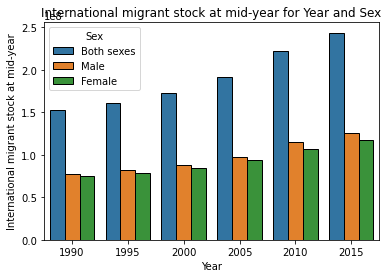

In [791]:
# See the IMS over time (years) by sex
sns.barplot(data = df1_world, x = "Year", y = 'International migrant stock at mid-year', hue = 'Sex').set(title = 'International migrant stock at mid-year for Year and Sex')

##### From this graph, yes, it looks like the international migrant stock has gone up steadily over the years

In [792]:
# How does this compare to the Total population of the world? 
# Make a new table sorted by the total population and grouped by sex
T1_world_totpop = T1_world.sort('Total population at mid-year (in thousands)', descending = True)
top_year_totpop = T1_world_totpop.sort('Sex', distinct = True)
top_year_totpop

Level,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
WORLD,Both sexes,2015,243700236,7.34947e+06,3.31589,NA,19577474,8.033424309035137
WORLD,Female,2015,117584801,3.64227e+06,3.22834,48.249769031819895,NA,NA
WORLD,Male,2015,126115435,3.70721e+06,3.4019,NA,NA,NA


##### It also looks like the total population is highest most recently, has it changed in a similar way to the IMS?

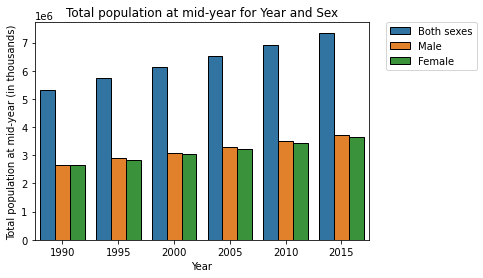

In [793]:
#Plot the Total Population by year and sex
sns.barplot(data = df1_world, x = "Year", y = 'Total population at mid-year (in thousands)', hue = 'Sex').set(title = 'Total population at mid-year for Year and Sex')
plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left", borderaxespad = 0)

##### The total population of the world also looks like it has gone up over the years (for all sexes)

In [794]:
# So if the changes in each variable are similar, maybe we can compare them...

# Will just be focusing on Both sexes (the total) for now
df1_world_both = df1_world[df1_world["Sex"] == "Both sexes"]

# Need to rescale the Total Population category, because it's currently measured in thousands, which makes it appear smaller than the IMS on one scale
df1_world_both["Total population at mid-year (in thousands)"] = df1_world_both["Total population at mid-year (in thousands)"]*1000

# Make the table
T1_world_both = Table().from_df(df1_world_both)

# Select only our variables of interest (Year, IMS and Total Pop)
compare_IMS_totpop = T1_world_both.select('Year', 'International migrant stock at mid-year', 'Total population at mid-year (in thousands)')
compare_IMS_totpop

<ipython-input-794-99da53df52f3>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Year,International migrant stock at mid-year,Total population at mid-year (in thousands)
1990,152563212,5.30967e+09
1995,160801752,5.73512e+09
2000,172703309,6.12662e+09
2005,191269100,6.51964e+09
2010,221714243,6.92973e+09
2015,243700236,7.34947e+09


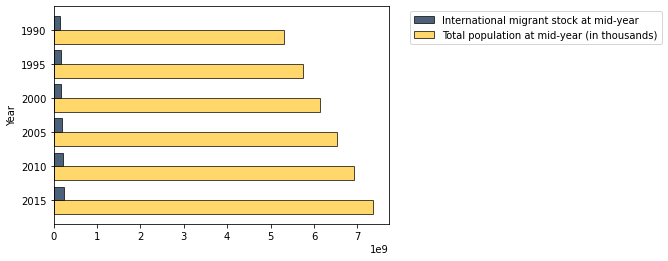

In [795]:
# Make a graph to compare the IMS next to the Total Pop
compare_IMS_totpop.barh('Year')

##### From this graph, we can see that the IMS is very small compared to the total population. Enough so that visualizations won't be a great way to see the differences. That is why the Percentage column is important.

### All "Extra" Areas - World, Developed Regions, Developing Regions, Sub-Saharan Africa, Least developed countries, and Less developed minus least developed countries

In [796]:
# From here on out, I would like to view all of the "Extra" areas/regions at once... 
extras = [' ', 'Developed or not']

df1_extras = df1[df1['Level'].isin(extras)]
df1_extras_both = df1_extras[df1_extras['Sex'] == "Both sexes"]

# Rename columns and values so that they will fit better in the plots
df1_extras_both.rename(columns = {"Major area, region, country or area of destination" : "Area"}, inplace = True)
df1_extras_both.rename(columns = {"International migrant stock at mid-year" : "International migrant<br>stock at mid-year"}, inplace = True)
df1_extras_both.rename(columns = {'Total population at mid-year (in thousands)' : 'Total population at mid-year<br>(in thousands)'}, inplace = True)
df1_extras_both.rename(columns = {'International migrant stock as percentage of total population' : 'International migrant stock<br>as % of total population'}, inplace = True)
df1_extras_both.rename(columns = {"Estimated refugee stock at mid-year" : "Estimated refugee stock<br>at mid-year"}, inplace = True)
df1_extras_both.rename(columns = {"Refugees as a percentage of the international migrant stock" : "Refugees as a % of the<br>international migrant stock"}, inplace = True)

df1_extras_both.replace("Least developed countries", "Least developed<br>countries", inplace = True)
df1_extras_both.replace("Less developed regions excluding least developed countries", "Less dev regions<br>minus countries", inplace = True)

df1_extras_both

C:\Users\crabb\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\crabb\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Original Sort Order,Area,Level,Notes,Country code,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrant<br>stock at mid-year,Total population at mid-year<br>(in thousands),International migrant stock<br>as % of total population,Percentage of international migrant stock,Estimated refugee stock<br>at mid-year,Refugees as a % of the<br>international migrant stock
0,1.0,WORLD,,NaN,900.0,,,,Both sexes,1990,152563212,5309667.699,2.873310,NA,18836571,12.346732
1,2.0,Developed regions,Developed or not,(b),901.0,,,,Both sexes,1990,82378628,1144463.062,7.198015,NA,2014564,2.445494
2,3.0,Developing regions,Developed or not,(c),902.0,,,,Both sexes,1990,70184584,4165204.637,1.685021,NA,16822007,23.968236
3,4.0,Least developed<br>countries,,(d),941.0,,,,Both sexes,1990,11075966,510057.629,2.171513,NA,5048391,45.565880
4,5.0,Less dev regions<br>minus countries,,NaN,934.0,,,,Both sexes,1990,59105261,3655147.008,1.617042,NA,11773616,19.919743
5,6.0,Sub-Saharan Africa,,(e),947.0,,,,Both sexes,1990,14690319,491497.691,2.988889,NA,5516042,37.548824
265,1.0,WORLD,,NaN,900.0,,,,Both sexes,1995,160801752,5735123.084,2.803806,NA,17853840,11.103013
266,2.0,Developed regions,Developed or not,(b),901.0,,,,Both sexes,1995,92306854,1169761.211,7.891085,NA,3609670,3.910511
267,3.0,Developing regions,Developed or not,(c),902.0,,,,Both sexes,1995,68494898,4565361.873,1.500317,NA,14244170,20.795958
268,4.0,Least developed<br>countries,,(d),941.0,,,,Both sexes,1995,11711703,585189.354,2.001353,NA,5160131,44.041961


In [797]:
# Similar to above, see which year is the highest IMS for each area

# Turn it into a table
T1_extras_both = Table().from_df(df1_extras_both)
T1_extras_both

Original Sort Order,Area,Level,Notes,Country code,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrantstock at mid-year,Total population at mid-year(in thousands),International migrant stockas % of total population,Percentage of international migrant stock,Estimated refugee stockat mid-year,Refugees as a % of theinternational migrant stock
1,WORLD,,nan,900,,,,Both sexes,1990,152563212,5.30967e+06,2.87331,NA,18836571,12.3467
2,Developed regions,Developed or not,(b),901,,,,Both sexes,1990,82378628,1.14446e+06,7.19802,NA,2014564,2.44549
3,Developing regions,Developed or not,(c),902,,,,Both sexes,1990,70184584,4.1652e+06,1.68502,NA,16822007,23.9682
4,Least developedcountries,,(d),941,,,,Both sexes,1990,11075966,510058,2.17151,NA,5048391,45.5659
5,Less dev regionsminus countries,,nan,934,,,,Both sexes,1990,59105261,3.65515e+06,1.61704,NA,11773616,19.9197
6,Sub-Saharan Africa,,(e),947,,,,Both sexes,1990,14690319,491498,2.98889,NA,5516042,37.5488
1,WORLD,,nan,900,,,,Both sexes,1995,160801752,5.73512e+06,2.80381,NA,17853840,11.103
2,Developed regions,Developed or not,(b),901,,,,Both sexes,1995,92306854,1.16976e+06,7.89109,NA,3609670,3.91051
3,Developing regions,Developed or not,(c),902,,,,Both sexes,1995,68494898,4.56536e+06,1.50032,NA,14244170,20.796
4,Least developedcountries,,(d),941,,,,Both sexes,1995,11711703,585189,2.00135,NA,5160131,44.042


In [798]:
# Sorting by IMS
T1_extras_IMS = T1_extras_both.sort("International migrant<br>stock at mid-year", descending = True)

# Grouping - See which year has the highest IMS for each area
top_year_extras_IMS = T1_extras_IMS.sort('Area', distinct = True)
top_year_extras_IMS

Original Sort Order,Area,Level,Notes,Country code,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrantstock at mid-year,Total population at mid-year(in thousands),International migrant stockas % of total population,Percentage of international migrant stock,Estimated refugee stockat mid-year,Refugees as a % of theinternational migrant stock
2,Developed regions,Developed or not,(b),901,,,,Both sexes,2015,140481955,1.25135e+06,11.2264,NA,1954224,1.39109
3,Developing regions,Developed or not,(c),902,,,,Both sexes,2015,103218281,6.09812e+06,1.69262,NA,17623250,17.0738
4,Least developedcountries,,(d),941,,,,Both sexes,2015,11951316,954158,1.25255,NA,3443582,28.8015
5,Less dev regionsminus countries,,nan,934,,,,Both sexes,2015,91262036,5.14396e+06,1.77416,NA,14179668,15.5373
6,Sub-Saharan Africa,,(e),947,,,,Both sexes,2015,18993986,962287,1.97384,NA,3638433,19.1557
1,WORLD,,nan,900,,,,Both sexes,2015,243700236,7.34947e+06,3.31589,NA,19577474,8.03342


##### SImilar to the "World" results, all areas have had the highest IMS in the most recent year (2015)... next let's see how it has changed over time

In [799]:
# Small multiple
extras_IMS = px.bar(data_frame = df1_extras_both, 
       x = 'Year',
       y = 'International migrant<br>stock at mid-year',
      facet_col = 'Area',
      facet_col_wrap = 3,
    facet_row_spacing = 0.15,
      title = "International migrant stock at mid-year, Per Year and Area")

extras_IMS.for_each_annotation(lambda title: title.update(text=title.text.split("=")[1]))
extras_IMS.update_yaxes(showgrid=False, gridcolor=None, ticks = "")

##### It appears that the international migrant stock has gone up, for ALL levels, except maybe the "Least Developed Countries" and "Sub-Saharan Africa"... though they are too small to really tell in comparison to the others, so I should look at them independently

In [800]:
# Do a single zoomed-in version with the Least Developed Countries

# Pull out only the "Both Sex" rows
df1_least_dev_both = df1_least_dev[df1_least_dev["Sex"] == "Both sexes"]

#Rename the column so that it wraps text
df1_least_dev_both.rename(columns = {"International migrant stock at mid-year" : "International migrant<br>stock at mid-year"}, inplace = True)

# Make the graph
least_dev_IMS = px.bar(data_frame = df1_least_dev_both, 
       x = 'Year',
       y = 'International migrant<br>stock at mid-year',
      title = "International migrant stock at mid-year<br>(per year) for least developed countries")

least_dev_IMS

C:\Users\crabb\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### In a more zoomed-in version, we can see that the IMS for the Least developed countries doesn't actually follow the same pattern as the other areas... it is not a continuous growth

In [801]:
# Do the same thing with the Sub-Saharan Africa

# Pull out only the "Both Sex" rows
df1_subsaharan_both = df1_subsaharan[df1_subsaharan["Sex"] == "Both sexes"]

#Rename the column so that it wraps text
df1_subsaharan_both.rename(columns = {"International migrant stock at mid-year" : "International migrant<br>stock at mid-year"}, inplace = True)

# Try doing the small multiple...
subsaharan_IMS = px.bar(data_frame = df1_subsaharan_both, 
       x = 'Year',
       y = 'International migrant<br>stock at mid-year',
      title = "International migrant stock at mid-year<br>(per year) for Sub-Saharan Africa")

subsaharan_IMS

##### Seeing the IMS for Sub-Saharan Africa in a more zoomed in version, we can see that it also doesn't grow super smoothly. However, the pattern is closer to the other areas (it grows in more recent years)

In [802]:
#Total Population at mid-year

# Sorting by Total Population
T1_extras_totpop = T1_extras_both.sort('Total population at mid-year<br>(in thousands)', descending = True)

# Grouping - See which year has the highest Total Population for each area
top_year_extras_totpop = T1_extras_totpop.sort('Area', distinct = True)
top_year_extras_totpop

Original Sort Order,Area,Level,Notes,Country code,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrantstock at mid-year,Total population at mid-year(in thousands),International migrant stockas % of total population,Percentage of international migrant stock,Estimated refugee stockat mid-year,Refugees as a % of theinternational migrant stock
2,Developed regions,Developed or not,(b),901,,,,Both sexes,2015,140481955,1.25135e+06,11.2264,NA,1954224,1.39109
3,Developing regions,Developed or not,(c),902,,,,Both sexes,2015,103218281,6.09812e+06,1.69262,NA,17623250,17.0738
4,Least developedcountries,,(d),941,,,,Both sexes,2015,11951316,954158,1.25255,NA,3443582,28.8015
5,Less dev regionsminus countries,,nan,934,,,,Both sexes,2015,91262036,5.14396e+06,1.77416,NA,14179668,15.5373
6,Sub-Saharan Africa,,(e),947,,,,Both sexes,2015,18993986,962287,1.97384,NA,3638433,19.1557
1,WORLD,,nan,900,,,,Both sexes,2015,243700236,7.34947e+06,3.31589,NA,19577474,8.03342


##### For all areas of the world, the largest population is the most recent year (2015)... but has it been a steady increase?

In [803]:
# Small Multiples
extras_totpop = px.bar(data_frame = df1_extras_both, 
       x = 'Year',
       y = 'Total population at mid-year<br>(in thousands)',
      facet_col = 'Area',
      facet_col_wrap = 3,
        facet_row_spacing = 0.15,
      title = "Total population mid-year Per Year and Area")

extras_totpop.for_each_annotation(lambda title: title.update(text=title.text.split("=")[1]))
extras_totpop.update_yaxes(showgrid=False, gridcolor=None, ticks = "")

##### For everything except Developed Regions, there does seem to be a steady increase in the population. For Developed Regions, it seems to have remained fairly constant (or the sample size is just a lot smaller, and it's harder to see)

In [804]:
#International Migrant Stock as Percentage of Total Pop (IMSPTP)

# Sorting 
T1_extras_IMSPTP = T1_extras_both.sort('International migrant stock<br>as % of total population', descending = True)

# Grouping - See which year has the highest IMSPTP for each area
top_year_extras_IMSPTP = T1_extras_IMSPTP.sort('Area', distinct = True)
top_year_extras_IMSPTP

Original Sort Order,Area,Level,Notes,Country code,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrantstock at mid-year,Total population at mid-year(in thousands),International migrant stockas % of total population,Percentage of international migrant stock,Estimated refugee stockat mid-year,Refugees as a % of theinternational migrant stock
2,Developed regions,Developed or not,(b),901,,,,Both sexes,2015,140481955,1.25135e+06,11.2264,NA,1954224,1.39109
3,Developing regions,Developed or not,(c),902,,,,Both sexes,2015,103218281,6.09812e+06,1.69262,NA,17623250,17.0738
4,Least developedcountries,,(d),941,,,,Both sexes,1990,11075966,510058,2.17151,NA,5048391,45.5659
5,Less dev regionsminus countries,,nan,934,,,,Both sexes,2015,91262036,5.14396e+06,1.77416,NA,14179668,15.5373
6,Sub-Saharan Africa,,(e),947,,,,Both sexes,1990,14690319,491498,2.98889,NA,5516042,37.5488
1,WORLD,,nan,900,,,,Both sexes,2015,243700236,7.34947e+06,3.31589,NA,19577474,8.03342


##### This one shows some differences... for some areas the percentage is higher earlier (1990) and for some it's more recent (2015)

In [805]:
# Small multiple...
extras_IMSPTP = px.bar(data_frame = df1_extras_both, 
       x = 'Year',
       y = 'International migrant stock<br>as % of total population',
      facet_col = 'Area',
      facet_col_wrap = 3,
    facet_row_spacing = 0.15,
      title = "International Migrant Stock as a Percentage<br>of the Total Population, Per Year and Area")

extras_IMSPTP.for_each_annotation(lambda title: title.update(text=title.text.split("=")[1]))
extras_IMSPTP.update_yaxes(showgrid=False, gridcolor=None, ticks = "")

##### SUPER interesting... The percentages seem to be the highest in Developed Regions! And there is a steady decline there...
##### In the rest of the locations, the percentage seems to be pretty steady (World, Less developed or developing) or slightly decreasing (Least developed, Sub-Saharan)¶

In [806]:
# Estimated Refugee Stock
# Sorting
T1_extras_ERS = T1_extras_both.sort('Estimated refugee stock<br>at mid-year', descending = True)

# Grouping - See which year has the highest estimated refugee stock for each area
top_year_extras_ERS = T1_extras_ERS.sort('Area', distinct = True)
top_year_extras_ERS

Original Sort Order,Area,Level,Notes,Country code,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrantstock at mid-year,Total population at mid-year(in thousands),International migrant stockas % of total population,Percentage of international migrant stock,Estimated refugee stockat mid-year,Refugees as a % of theinternational migrant stock
2,Developed regions,Developed or not,(b),901,,,,Both sexes,1995,92306854,1.16976e+06,7.89109,NA,3609670,3.91051
3,Developing regions,Developed or not,(c),902,,,,Both sexes,2015,103218281,6.09812e+06,1.69262,NA,17623250,17.0738
4,Least developedcountries,,(d),941,,,,Both sexes,1995,11711703,585189,2.00135,NA,5160131,44.042
5,Less dev regionsminus countries,,nan,934,,,,Both sexes,2015,91262036,5.14396e+06,1.77416,NA,14179668,15.5373
6,Sub-Saharan Africa,,(e),947,,,,Both sexes,1995,15324570,562978,2.72205,NA,5747830,37.5073
1,WORLD,,nan,900,,,,Both sexes,2015,243700236,7.34947e+06,3.31589,NA,19577474,8.03342


In [807]:
##### This is very interesting because some of the locations have the highest ERS at the beginning of the time collected (1995) (Developed, Least developed, Sub-saharan), but some have the highest most recently (Developing, Less developed minus countries, World)

In [808]:
# Try doing the small multiple...
extras_ERS = px.bar(data_frame = df1_extras_both, 
       x = 'Year',
       y = 'Estimated refugee stock<br>at mid-year',
      facet_col = 'Area',
      facet_col_wrap = 3,
    facet_row_spacing = 0.15,
      title = "Estimated refugee stock at mid-year Per Year and Area")

extras_ERS.for_each_annotation(lambda title: title.update(text=title.text.split("=")[1]))
extras_ERS.update_yaxes(showgrid=False, gridcolor=None, ticks = "")

##### Through this collection of charts, we can see there is a different relationship than migrants... Migrants went up over the years. However this variable almost have a "U" shape for each area... it started out high, went down around 2000-2010, but rose back up in 2015.
##### However, slightly different in the "Developed regions"....
##### It's also crazy to see how a large majority of the refugee stock is in the Developing or less developed regions... not the Developed Regions

In [809]:
# Refugees as percentage of the International Migrant Stock

#Sorting
T1_extras_RPM = T1_extras_both.sort('Refugees as a % of the<br>international migrant stock', descending = True)

# Grouping - See which year has the RPM for each area
top_year_extras_RPM = T1_extras_RPM.sort('Area', distinct = True)
top_year_extras_RPM

Original Sort Order,Area,Level,Notes,Country code,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrantstock at mid-year,Total population at mid-year(in thousands),International migrant stockas % of total population,Percentage of international migrant stock,Estimated refugee stockat mid-year,Refugees as a % of theinternational migrant stock
2,Developed regions,Developed or not,(b),901,,,,Both sexes,1995,92306854,1.16976e+06,7.89109,NA,3609670,3.91051
3,Developing regions,Developed or not,(c),902,,,,Both sexes,1990,70184584,4.1652e+06,1.68502,NA,16822007,23.9682
4,Least developedcountries,,(d),941,,,,Both sexes,1990,11075966,510058,2.17151,NA,5048391,45.5659
5,Less dev regionsminus countries,,nan,934,,,,Both sexes,1990,59105261,3.65515e+06,1.61704,NA,11773616,19.9197
6,Sub-Saharan Africa,,(e),947,,,,Both sexes,1990,14690319,491498,2.98889,NA,5516042,37.5488
1,WORLD,,nan,900,,,,Both sexes,1990,152563212,5.30967e+06,2.87331,NA,18836571,12.3467


##### From this chart, we can see that the largest year for Refugee percentage is early on for all of them (1990, 1995). Let's take a closer look at the trends over time... did it decrease steadily?

In [810]:
# Small Multiple
extras_RPM = px.bar(data_frame = df1_extras_both, 
       x = 'Year',
       y = 'Refugees as a % of the<br>international migrant stock',
      facet_col = 'Area',
      facet_col_wrap = 3,
      facet_row_spacing = 0.15,              
      title = "Refugees as a Percentage of the International Migrant Stock, Per Year and Area")

extras_RPM.for_each_annotation(lambda title: title.update(text=title.text.split("=")[1]))
extras_RPM.update_yaxes(showgrid=False, gridcolor=None, ticks = "")

##### It looks like for almost all the regions, the RPM decreased over time (in Sub-Saharan Africa and Least Developed Countries, the decrease looks pretty strong)

### Comparing Males and Females (in IMSPTP)

In [811]:
# Make a dataset of Males and females for Extra locations
mf = ["Male", "Female"]
df1_extras_mf = df1_extras[df1_extras["Sex"].isin(mf)]
df1_extras_mf.rename(columns = {"Major area, region, country or area of destination" : "Area"}, inplace = True)
df1_extras_mf.rename(columns = {"International migrant stock as percentage of total population" : "International migrant stock<br>as % of total pop."}, inplace = True)
df1_extras_mf.replace("Least developed countries", "Least developed<br>countries", inplace = True)
df1_extras_mf.replace("Less developed regions excluding least developed countries", "Less dev regions<br>minus countries", inplace = True)

# Turning it into a table to Sort and Group
T1_extras_mf = Table().from_df(df1_extras_mf)
T1_extras_mf

C:\Users\crabb\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Original Sort Order,Area,Level,Notes,Country code,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stockas % of total pop.,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
1,WORLD,,nan,900,,,,Male,1990,77747510,2.67042e+06,2.91143,NA,NA,NA
2,Developed regions,Developed or not,(b),901,,,,Male,1990,40263397,555256,7.25133,NA,NA,NA
3,Developing regions,Developed or not,(c),902,,,,Male,1990,37484113,2.11517e+06,1.77216,NA,NA,NA
4,Least developedcountries,,(d),941,,,,Male,1990,5843107,254043,2.30005,NA,NA,NA
5,Less dev regionsminus countries,,nan,934,,,,Male,1990,31641006,1.86113e+06,1.7001,NA,NA,NA
6,Sub-Saharan Africa,,(e),947,,,,Male,1990,7745306,244591,3.16664,NA,NA,NA
1,WORLD,,nan,900,,,,Male,1995,81737477,2.88664e+06,2.83158,NA,NA,NA
2,Developed regions,Developed or not,(b),901,,,,Male,1995,45092799,568268,7.93512,NA,NA,NA
3,Developing regions,Developed or not,(c),902,,,,Male,1995,36644678,2.31837e+06,1.58062,NA,NA,NA
4,Least developedcountries,,(d),941,,,,Male,1995,6142712,292027,2.10348,NA,NA,NA


In [812]:
# Going to focus on the International Migrant Stock as a Percentage of the Total Population - most interesting variable in my opinion

# Small multiple
extras_IMSPTP_mf = px.bar(data_frame = df1_extras_mf, 
       x = 'Year',
       y = 'International migrant stock<br>as % of total pop.', 
        #facet_row = "Sex",
        color = "Sex",
        barmode = "group",
        facet_col = 'Area',
      facet_col_wrap = 3,
    facet_row_spacing = 0.15,
      title = "International migrant stock as a Percentage of the Total Population, Per Year, Sex and Area")

extras_IMSPTP_mf.for_each_annotation(lambda title: title.update(text=title.text.split("=")[1]))
extras_IMSPTP_mf.update_yaxes(showgrid=False, gridcolor=None, ticks = "")

##### From this graph we can see that for all areas, the percentages for males and females are fairly equal. Good to know!

### Female-only variable

In [813]:
# Doing the Female-only variable... looking at the grouping by year and Area as well
# Making the dataset
df1_extras_fem = df1_extras[df1_extras["Sex"] == "Female"]

# Renaming necessary columns (for space and clarity)
df1_extras_fem.rename(columns = {"Major area, region, country or area of destination" : "Area"}, inplace = True)
df1_extras_fem.rename(columns = {"Percentage of international migrant stock" : "% of International<br>Migrant Stock"}, inplace = True)

# Renaming certain values (for saving space in charts)
df1_extras_fem.replace("Least developed countries", "Least developed<br>countries", inplace = True)
df1_extras_fem.replace("Less developed regions excluding least developed countries", "Less dev regions<br>minus countries", inplace = True)

# Viewing the dataset
df1_extras_fem

,Original Sort Order,Area,Level,Notes,Country code,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,% of International<br>Migrant Stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
3180,1.0,WORLD,,NaN,900.0,,,,Female,1990,74815702,2639243.998,2.834740,49.039150,NA,NA
3181,2.0,Developed regions,Developed or not,(b),901.0,,,,Female,1990,42115231,589207.436,7.147777,51.123977,NA,NA
3182,3.0,Developing regions,Developed or not,(c),902.0,,,,Female,1990,32700471,2050036.562,1.595116,46.592099,NA,NA
3183,4.0,Least developed<br>countries,,(d),941.0,,,,Female,1990,5236216,256015.073,2.045276,47.261155,NA,NA
3184,5.0,Less dev regions<br>minus countries,,NaN,934.0,,,,Female,1990,27464255,1794021.489,1.530877,46.466684,NA,NA
3185,6.0,Sub-Saharan Africa,,(e),947.0,,,,Female,1990,6945013,246907.154,2.812803,47.276121,NA,NA
3445,1.0,WORLD,,NaN,900.0,,,,Female,1995,79064275,2848487.191,2.775658,49.168790,NA,NA
3446,2.0,Developed regions,Developed or not,(b),901.0,,,,Female,1995,47214055,601492.755,7.849480,51.149024,NA,NA
3447,3.0,Developing regions,Developed or not,(c),902.0,,,,Female,1995,31850220,2246994.436,1.417459,46.500135,NA,NA
3448,4.0,Least developed<br>countries,,(d),941.0,,,,Female,1995,5573685,293162.612,1.901226,47.571664,NA,NA


In [814]:
# Turning it into a table to Sort and Group
T1_extras_fem = Table().from_df(df1_extras_fem)

# Sort by the Percentage of International Migrant Stock (PIMS)
T1_extras_PIMS = T1_extras_fem.sort('% of International<br>Migrant Stock', descending = True)

# Grouping - See which year has the highest estimated refugee stock for each area
top_year_extras_PIMS = T1_extras_PIMS.sort('Area', distinct = True)
top_year_extras_PIMS

Original Sort Order,Area,Level,Notes,Country code,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,% of InternationalMigrant Stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
2,Developed regions,Developed or not,(b),901,,,,Female,2015,72863336,642054,11.3485,51.8667,NA,NA
3,Developing regions,Developed or not,(c),902,,,,Female,1990,32700471,2.05004e+06,1.59512,46.5921,NA,NA
4,Least developedcountries,,(d),941,,,,Female,1995,5573685,293163,1.90123,47.5717,NA,NA
5,Less dev regionsminus countries,,nan,934,,,,Female,1990,27464255,1.79402e+06,1.53088,46.4667,NA,NA
6,Sub-Saharan Africa,,(e),947,,,,Female,1995,7287746,282794,2.57705,47.556,NA,NA
1,WORLD,,nan,900,,,,Female,1995,79064275,2.84849e+06,2.77566,49.1688,NA,NA


##### From this table, we can see that there is some variation in when the percentage of the international migrant stock that is female: for most areas it is early on (1990 or 1995), but for developed regions it is most recent (2015). What do the changes look like over time?

In [815]:
# Set up small multiple
extras_PIMS = px.bar(data_frame = df1_extras_fem, 
       x = 'Year',
       y = '% of International<br>Migrant Stock', 
        #facet_row = "Sex",
        #color = "Sex",
        #barmode = "group",
        facet_col = 'Area',
      facet_col_wrap = 3,
    facet_row_spacing = 0.15,
      title = "Percentage of International Migrant Stock that is Female,<br>Per Year and Area")

extras_PIMS.for_each_annotation(lambda title: title.update(text=title.text.split("=")[1]))
extras_PIMS.update_yaxes(showgrid=False, gridcolor=None, ticks = "")

##### From these graphs, we can see that the percentage remains fairly consistent, both across time and regions. It is slightly lower in developing regions and less developed regions, at least by the end of the time period.

### Countries Data

In [816]:
df1_countries.reset_index(inplace = True) # Without this, the row indices were not starting at 0
df1_countries.rename(columns = {"index" : "Original Index"}, inplace = True)
df1_countries

,Original Index,Country,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
0,8,Burundi,Born,Yes,,Both sexes,1990,333110,5613.14,5.93447,NA,267929,80.4326
1,9,Comoros,Born,,,Both sexes,1990,14079,415.144,3.39135,NA,0,0
2,10,Djibouti,Born,Yes,,Both sexes,1990,122221,588.356,20.7733,NA,54508,44.5979
3,11,Eritrea,,,Yes,Both sexes,1990,11848,3139.08,0.377435,NA,0,0
4,12,Ethiopia,Born,Yes,,Both sexes,1990,1155390,48057.1,2.4042,NA,741965,64.2177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,4765,Samoa,Born,,,Female,2015,2460,93.584,2.62865,49.9087,NA,NA
4172,4766,Tokelau,Born,,,Female,2015,254,..,..,52.1561,NA,NA
4173,4767,Tonga,Born,,,Female,2015,2604,52.931,4.91961,45.4371,NA,NA
4174,4768,Tuvalu,Citizen,,,Female,2015,63,..,..,44.6809,NA,NA


In [817]:
# Make a column that will represent the "Region", and make it an empty list to add to the datafram
regions = []

for i in range(0, df1_countries.shape[0]):
    regions.append(" ")
    
# Add the column to the dataframe
df1_countries.insert(2, "Region", regions)

# Make an empty dictionary for country-region pairs
country_region = {}
 
# Make a for-loop to go through the Annex and add each country-region pair to the dictionary
for i in range(0, annex.shape[0]):
    country_region[annex.at[i, "Country or area"]] = annex.at[i, "Region"]
    
# Use this dictionary to add variables to "region" column
for i in range(0, df1_countries.shape[0]):
    df1_countries.at[i, "Region"] = country_region[df1_countries.at[i, "Country"]]
    
df1_countries

,Original Index,Country,Region,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
0,8,Burundi,Eastern Africa,Born,Yes,,Both sexes,1990,333110,5613.14,5.93447,NA,267929,80.4326
1,9,Comoros,Eastern Africa,Born,,,Both sexes,1990,14079,415.144,3.39135,NA,0,0
2,10,Djibouti,Eastern Africa,Born,Yes,,Both sexes,1990,122221,588.356,20.7733,NA,54508,44.5979
3,11,Eritrea,Eastern Africa,,,Yes,Both sexes,1990,11848,3139.08,0.377435,NA,0,0
4,12,Ethiopia,Eastern Africa,Born,Yes,,Both sexes,1990,1155390,48057.1,2.4042,NA,741965,64.2177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,4765,Samoa,Polynesia,Born,,,Female,2015,2460,93.584,2.62865,49.9087,NA,NA
4172,4766,Tokelau,Polynesia,Born,,,Female,2015,254,..,..,52.1561,NA,NA
4173,4767,Tonga,Polynesia,Born,,,Female,2015,2604,52.931,4.91961,45.4371,NA,NA
4174,4768,Tuvalu,Polynesia,Citizen,,,Female,2015,63,..,..,44.6809,NA,NA


In [818]:
# Do the same thing as above to add the "Major Area" column
# Make a column that will represent the "Major Area", and make it an empty list to add to the datafram
maj_areas = []

for i in range(0, df1_countries.shape[0]):
    maj_areas.append(" ")
    
# Add the column to the dataframe
df1_countries.insert(3, "Major Area", maj_areas)

# Make an empty dictionary for region-major area pairs
region_maj = {}
 
# make a for-loop to go through the Annex and add each pair to the dictionary
for i in range(0, annex.shape[0]):
    region_maj[annex.at[i, "Region"]] = annex.at[i, "Major area"]

# Use this dictionary to add variables to "Major Area" column
for i in range(0, df1_countries.shape[0]):
    df1_countries.at[i, "Major Area"] = region_maj[df1_countries.at[i, "Region"]]
    
df1_countries

,Original Index,Country,Region,Major Area,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
0,8,Burundi,Eastern Africa,Africa,Born,Yes,,Both sexes,1990,333110,5613.14,5.93447,NA,267929,80.4326
1,9,Comoros,Eastern Africa,Africa,Born,,,Both sexes,1990,14079,415.144,3.39135,NA,0,0
2,10,Djibouti,Eastern Africa,Africa,Born,Yes,,Both sexes,1990,122221,588.356,20.7733,NA,54508,44.5979
3,11,Eritrea,Eastern Africa,Africa,,,Yes,Both sexes,1990,11848,3139.08,0.377435,NA,0,0
4,12,Ethiopia,Eastern Africa,Africa,Born,Yes,,Both sexes,1990,1155390,48057.1,2.4042,NA,741965,64.2177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,4765,Samoa,Polynesia,Oceania,Born,,,Female,2015,2460,93.584,2.62865,49.9087,NA,NA
4172,4766,Tokelau,Polynesia,Oceania,Born,,,Female,2015,254,..,..,52.1561,NA,NA
4173,4767,Tonga,Polynesia,Oceania,Born,,,Female,2015,2604,52.931,4.91961,45.4371,NA,NA
4174,4768,Tuvalu,Polynesia,Oceania,Citizen,,,Female,2015,63,..,..,44.6809,NA,NA


In [819]:
# Fill in empty cells with actual "NA" value and change strings to integers so we can sort

# Replace all ".." with "NaN"
df1_countries.replace("..", " ", inplace = True)
df1_countries.replace(" ", pd.NA, inplace = True)

# Change integers to strings (for IMS)
for i in range(0, df1_countries.shape[0]):
    if pd.notna(df1_countries.at[i, "International migrant stock as percentage of total population"]):
        df1_countries.at[i, "International migrant stock as percentage of total population"] = int(df1_countries.at[i, "International migrant stock as percentage of total population"])

In [820]:
# International Migrant Stock at mid-year
df1_countries_IMSPTP = df1_countries.sort_values(by = "International migrant stock as percentage of total population", 
                          ascending = False,
                          na_position = "last")

# Remove all rows with NA for the moment
df1_countries_IMSPTP.drop(df1_countries_IMSPTP[df1_countries_IMSPTP['International migrant stock as percentage of total population'].isna() == True].index, inplace = True)

df1_countries_IMSPTP

,Original Index,Country,Region,Major Area,Born or Citizen,Refugees Added,Imputation,Sex,Year,International migrant stock at mid-year,Total population at mid-year (in thousands),International migrant stock as percentage of total population,Percentage of international migrant stock,Estimated refugee stock at mid-year,Refugees as a percentage of the international migrant stock
1297,1484,Holy See,Southern Europe,Europe,<NA>,<NA>,Yes,Both sexes,2015,800,0.8,100,NA,0,0
1065,1219,Holy See,Southern Europe,Europe,<NA>,<NA>,Yes,Both sexes,2010,799,0.799,100,NA,0,0
137,159,Holy See,Southern Europe,Europe,<NA>,<NA>,Yes,Both sexes,1990,770,0.77,100,NA,0,0
601,689,Holy See,Southern Europe,Europe,<NA>,<NA>,Yes,Both sexes,2000,787,0.787,100,NA,0,0
833,954,Holy See,Southern Europe,Europe,<NA>,<NA>,Yes,Both sexes,2005,793,0.798,99,NA,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589,2963,Lesotho,Southern Africa,Africa,Citizen,Yes,<NA>,Male,2015,3558,1056.78,0,NA,NA,NA
3448,3937,Peru,South America,Latin America and the Caribbean,Born,<NA>,<NA>,Female,2000,33338,12964,0,50.2889,NA,NA
2586,2959,Tunisia,Northern Africa,Africa,Citizen,<NA>,<NA>,Male,2015,29351,5561.09,0,NA,NA,NA
2584,2957,Morocco,Northern Africa,Africa,Citizen,<NA>,<NA>,Male,2015,44390,16989.3,0,NA,NA,NA


##### 

In [821]:
# Going to separate it into "Both sexes" and "M/F" again, because I want different plots for them
df1_countries_IMSPTP_both = df1_countries_IMSPTP[df1_countries_IMSPTP["Sex"] == "Both sexes"]

mf = ["Male", "Female"]
df1_countries_IMSPTP_mf = df1_countries_IMSPTP[df1_countries_IMSPTP["Sex"].isin(mf)]

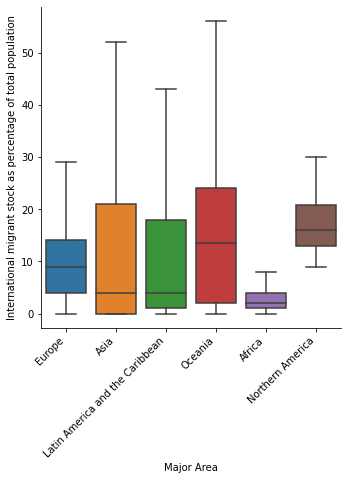

In [822]:
# For the combined one, I want a BOXPLOT of IMS... based on REGION
# Removing outliers for now because it was making it too hard to see smaller ones
major_areas_IMSPTP = sns.catplot(data = df1_countries_IMSPTP_both,
           kind = "box",
           x = "Major Area",
           y = 'International migrant stock as percentage of total population',
           showfliers = False)

major_areas_IMSPTP.set_xticklabels(rotation=45, horizontalalignment='right')

[Text(0, 0, 'Asia'),
 Text(1, 0, 'Latin America and the Caribbean'),
 Text(2, 0, 'Oceania'),
 Text(3, 0, 'Europe'),
 Text(4, 0, 'Africa'),
 Text(5, 0, 'Northern America')]

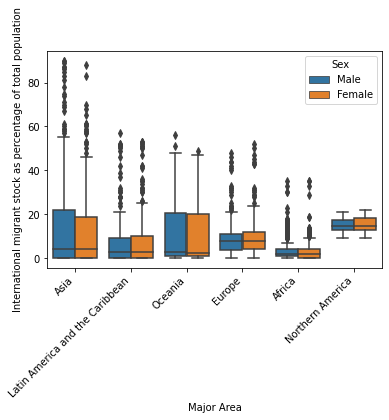

In [823]:
# Boxplot for MF
IMSPTP_mf = sns.boxplot(data = df1_countries_IMSPTP_mf,
           x = "Major Area",
           y = "International migrant stock as percentage of total population",
           hue = "Sex")

IMSPTP_mf.set_xticklabels(IMSPTP_mf.get_xticklabels(), rotation=45, horizontalalignment='right')

### Repeat everything for Table 5

In [824]:
df5_countries.reset_index(inplace = True)

In [825]:
# Make a column that will represent the "Region", and make it an empty list to add to the datafram
regions_df5 = []

for i in range(0, df5_countries.shape[0]):
    regions_df5.append(" ")
    
# Add the column to the dataframe
df5_countries.insert(2, "Region", regions_df5)

# Make an empty dictionary for country-region pairs
country_region_df5 = {}
 
# Make a for-loop to go through the Annex and add each country-region pair to the dictionary
for i in range(0, annex.shape[0]):
    country_region_df5[annex.at[i, "Country or area"]] = annex.at[i, "Region"]
    
# Use this dictionary to add variables to "region" column
for i in range(0, df5_countries.shape[0]):
    df5_countries.at[i, "Region"] = country_region_df5[df5_countries.at[i, "Country"]]
    
df5_countries

,index,Country,Region,Born or Citizen,Refugees Added,Imputation,Sex,Year Range,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
0,8,Burundi,Eastern Africa,Born,Yes,,Both Sexes,1990-1995,-5.35572,-3.39093
1,9,Comoros,Eastern Africa,Born,,,Both Sexes,1990-1995,-0.199873,..
2,10,Djibouti,Eastern Africa,Born,Yes,,Both Sexes,1990-1995,-4.05847,-9.76343
3,11,Eritrea,Eastern Africa,,,Yes,Both Sexes,1990-1995,0.910748,..
4,12,Ethiopia,Eastern Africa,Born,Yes,,Both Sexes,1990-1995,-7.17977,-5.50572
...,...,...,...,...,...,...,...,...,...,...
3475,3970,Samoa,Polynesia,Born,,,Female,2010-2015,-0.545343,NA
3476,3971,Tokelau,Polynesia,Born,,,Female,2010-2015,2.60325,NA
3477,3972,Tonga,Polynesia,Born,,,Female,2010-2015,2.52632,NA
3478,3973,Tuvalu,Polynesia,Citizen,,,Female,2010-2015,-1.81944,NA


In [826]:
# Do the same thing as above to add the "Major Area" column
# Make a column that will represent the "Major Area", and make it an empty list to add to the datafram
maj_areas_df5 = []

for i in range(0, df5_countries.shape[0]):
    maj_areas_df5.append(" ")
    
# Add the column to the dataframe
df5_countries.insert(3, "Major Area", maj_areas_df5)

# Make an empty dictionary for region-major area pairs
region_maj_df5 = {}
 
# make a for-loop to go through the Annex and add each pair to the dictionary
for i in range(0, annex.shape[0]):
    region_maj_df5[annex.at[i, "Region"]] = annex.at[i, "Major area"]

# Use this dictionary to add variables to "Major Area" column
for i in range(0, df5_countries.shape[0]):
    df5_countries.at[i, "Major Area"] = region_maj_df5[df5_countries.at[i, "Region"]]
    
df5_countries

,index,Country,Region,Major Area,Born or Citizen,Refugees Added,Imputation,Sex,Year Range,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
0,8,Burundi,Eastern Africa,Africa,Born,Yes,,Both Sexes,1990-1995,-5.35572,-3.39093
1,9,Comoros,Eastern Africa,Africa,Born,,,Both Sexes,1990-1995,-0.199873,..
2,10,Djibouti,Eastern Africa,Africa,Born,Yes,,Both Sexes,1990-1995,-4.05847,-9.76343
3,11,Eritrea,Eastern Africa,Africa,,,Yes,Both Sexes,1990-1995,0.910748,..
4,12,Ethiopia,Eastern Africa,Africa,Born,Yes,,Both Sexes,1990-1995,-7.17977,-5.50572
...,...,...,...,...,...,...,...,...,...,...,...
3475,3970,Samoa,Polynesia,Oceania,Born,,,Female,2010-2015,-0.545343,NA
3476,3971,Tokelau,Polynesia,Oceania,Born,,,Female,2010-2015,2.60325,NA
3477,3972,Tonga,Polynesia,Oceania,Born,,,Female,2010-2015,2.52632,NA
3478,3973,Tuvalu,Polynesia,Oceania,Citizen,,,Female,2010-2015,-1.81944,NA


In [827]:
# Fill in empty cells with actual "NA" value and change strings to integers so we can sort

# Replace all ".." with "NaN"
df5_countries.replace("..", " ", inplace = True)
df5_countries.replace(" ", pd.NA, inplace = True)

# Change integers to strings (for IMS)
#for i in range(0, df5_countries.shape[0]):
   # if pd.notna(df1_countries.at[i, "International migrant stock as percentage of total population"]):
       # df1_countries.at[i, "International migrant stock as percentage of total population"] = int(df1_countries.at[i, "International migrant stock as percentage of total population"])

In [828]:
# International Migrant Stock at mid-year
df5_countries_ROC_mig = df5_countries.sort_values(by = "Annual rate of change of the migrant stock", 
                          ascending = False,
                          na_position = "last")

# Remove all rows with NA for the moment
df5_countries_ROC_mig.drop(df5_countries_ROC_mig[df5_countries_ROC_mig['Annual rate of change of the migrant stock'].isna() == True].index, inplace = True)

df5_countries_ROC_mig

,index,Country,Region,Major Area,Born or Citizen,Refugees Added,Imputation,Sex,Year Range,Annual rate of change of the migrant stock,Annual rate of change of the refugee stock
2463,2815,Serbia,Southern Europe,Europe,Born,<NA>,<NA>,Female,1990-1995,37.3807,NA
143,165,Serbia,Southern Europe,Europe,Born,<NA>,<NA>,Both Sexes,1990-1995,36.9647,84.6356
1303,1490,Serbia,Southern Europe,Europe,Born,<NA>,<NA>,Male,1990-1995,36.4862,NA
3329,3808,Afghanistan,Southern Asia,Asia,Born,<NA>,<NA>,Female,2010-2015,28.9001,NA
2807,3212,Chad,Middle Africa,Africa,Born,Yes,<NA>,Female,2000-2005,27.6117,NA
...,...,...,...,...,...,...,...,...,...,...,...
418,477,Honduras,Central America,Latin America and the Caribbean,Born,Yes,<NA>,Both Sexes,1995-2000,-33.1675,-152.541
2738,3127,Honduras,Central America,Latin America and the Caribbean,Born,Yes,<NA>,Female,1995-2000,-33.3,NA
1174,1347,Somalia,Eastern Africa,Africa,<NA>,Yes,Yes,Male,1990-1995,-63.3519,NA
14,22,Somalia,Eastern Africa,Africa,<NA>,Yes,Yes,Both Sexes,1990-1995,-63.9685,-68.0241


##### OOOO This one doesn't really work, because some of the "Negative" changes were actually larger than positive

In [829]:
# Going to separate it into "Both sexes" and "M/F" again, because I want different plots for them
df5_countries_ROC_mig_both = df5_countries_ROC_mig[df5_countries_ROC_mig["Sex"] == "Both sexes"]

mf = ["Male", "Female"]
df5_countries_ROC_mig_mf = df5_countries_ROC_mig[df5_countries_ROC_mig["Sex"].isin(mf)]